#About the project
The dataset contains information about credit applicants. Banks, globally, use this kind of dataset and type of informative data to create models to help in deciding on who to accept/refuse for a loan.


After all the exploratory data analysis, cleansing and dealing with all the anomalies we might (will) find along the way, the patterns of a good/bad applicant will be exposed to be learned by machine learning models.

Machine Learning issue and objectives
We’re dealing with a supervised binary classification problem. The goal is to train the best machine learning model to maximize the predictive capability of deeply understanding the past customer’s profile minimizing the risk of future loan defaults.

#Performance Metric
The metric used for the models’ evaluation is the ROC AUC given that we’re dealing with a highly unbalanced data.

#Project structure
The project divides into three categories:

EDA: Exploratory Data Analysis
Data Wrangling: Cleansing and Feature Selection
Machine Learning: Predictive Modelling
The dataset
You can download the data set here.

#Feature description

id: Unique ID of the loan application.

grade: LC assigned loan grade.

annual_inc: The self-reported annual income provided by the borrower during registration.

short_emp: 1 when employed for 1 year or less.

emp_length_num: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership: Type of home ownership.

dti (Debt-To-Income Ratio): A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

purpose: A category provided by the borrower for the loan request.

term: The number of payments on the loan. Values are in months and can be either 36 or 60.

last_delinq_none: 1 when the borrower had at least one event of delinquency.

last_major_derog_none: 1 borrower had at least 90 days of a bad rating.

revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_rec_late_fee: Late fees received to date.

od_ratio: Overdraft ratio.

bad_loan: 1 when a loan was not paid.

In [422]:
import pandas as pd
import numpy as np
import seaborn as sns

In [423]:
  data = pd.read_csv('/content/lending_club_loan_dataset.csv', low_memory=False)
  data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


# EDA: Explaratory Data Analysis

In [424]:
#Main stats of numeric attributes:
data.describe().round(3)

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000,20000.000,20000.000,19846.000,20000.000,574.000,20000.000,20000.000,20000.000,20000.0
mean,7.590662e+06,73349.578,0.112,6.821,16.588,0.547,0.760,55.958,0.291,0.504,0.2
std,1.609593e+06,45198.567,0.316,3.774,7.586,0.498,0.428,42.117,3.109,0.288,0.4
min,5.860400e+05,8412.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
25%,6.206283e+06,47000.000,0.000,3.000,10.852,0.000,1.000,38.800,0.000,0.257,0.0
50%,7.378896e+06,65000.000,0.000,7.000,16.190,1.000,1.000,57.100,0.000,0.507,0.0
75%,8.766235e+06,88000.000,0.000,11.000,22.060,1.000,1.000,73.900,0.000,0.754,0.0
max,1.145464e+07,1000000.000,1.000,11.000,34.990,1.000,1.000,5010.000,96.467,1.000,1.0


The dataset has 2000 observations and 15 variables including the target, divided into 11 numeric and 4 categoric features.

There are variables with missing values: ‘home_ownership’ with 7.46%, ‘dti’ with 0.77%, and ‘last_major_derog_none’ with 97.13%.

From the difference between the mean and the median, and also the distance of maximum values of the variables ‘annual_inc’, ‘revol_util’ and ‘total_rec_late_fee’, it seems there are some outliers.

In [425]:
#Main stats of categoric attributes:
data.describe(include=[np.object])

,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


In [426]:
# Checking data balance/proportion
loan = data.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)

,absolute,percent
0,16000,80.0
1,4000,20.0


In [427]:
import matplotlib.pyplot as plt

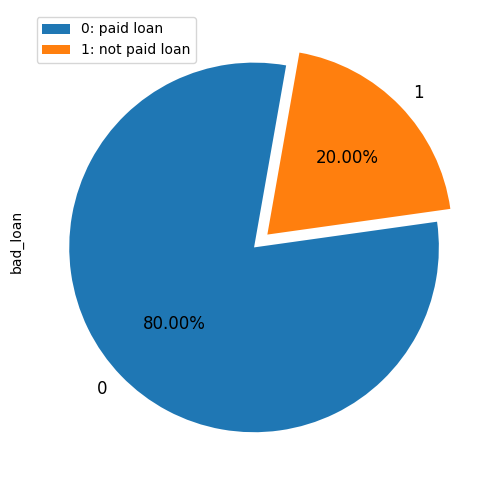

In [428]:
# pie chart
data.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);

Unbalanced data: target has 80% of default results (value 1) against 20% of loans that ended up by been paid/ non-default (value 0).

In [429]:
#Type of variables:
data.dtypes.sort_values(ascending=True)

id                         int64
short_emp                  int64
emp_length_num             int64
last_delinq_none           int64
bad_loan                   int64
annual_inc               float64
dti                      float64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
grade                     object
home_ownership            object
purpose                   object
term                      object
dtype: object

In [430]:
#Couting variables by type:
data.dtypes.value_counts()

float64    6
int64      5
object     4
dtype: int64

# Checking For Missing Values

In [431]:
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,1491,7.08
dti,154,0.73
purpose,0,0.00
term,0,0.00
last_delinq_none,0,0.00


Describing all the features in the dataset using and abusing graphics. Start by defining a few functions for every chart: boxplot, histograms, bar and pie charts, scatterplots, pivot charts, as well as a statistic descriptions.

In [432]:
import scipy

In [433]:
# General statistics
def stats(x):
    print(f"Variable: {x}")
    print(f"Type of variable: {data[x].dtype}")
    print(f"Total observations: {data[x].shape[0]}")
    detect_null_val = data[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {data[x].isnull().sum()} ({(data[x].isnull().sum() / data[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values? {data[x].isnull().values.any()}")
    print(f"Unique values: {data[x].nunique()}")
    if data[x].dtype != "O":
        print(f"Min: {int(data[x].min())}")
        print(f"25%: {int(data[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(data[x].median())}")
        print(f"75%: {int(data[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(data[x].max())}")
        print(f"Mean: {data[x].mean()}")
        print(f"Std dev: {data[x].std()}")
        print(f"Variance: {data[x].var()}")
        print(f"Skewness: {scipy.stats.skew(data[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(data[x])}")
        print("")
        
        # Percentiles 1%, 5%, 95% and 99%
        print("Percentiles 1%, 5%, 95%, 99%")
        display(data[x].quantile(q=[.01, .05, .95, .99]))
        print("")
    else:
        print(f"List of unique values: {data[x].unique()}")

# Variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [434]:
# Boxplot & Histogram

def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean= np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

In [435]:
 # Histogram
def hist(x):
    plt.hist(data[x], bins=25)
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

# Pie chart
def pie(x):
    data[x].value_counts(dropna=False).plot(kind='pie', figsize=(6,5), fontsize=10, autopct='%1.1f%%', startangle=0, legend=True, textprops={'color':"white", 'weight':'bold'});
# Number of observations by class
    obs = data[x].value_counts(dropna=False)
    o = pd.DataFrame(obs)
    o.rename(columns={x:"Freq abs"}, inplace=True)
    o_pc = (data[x].value_counts(normalize=True) * 100).round(2)
    obs_pc = pd.DataFrame(o_pc)
    obs_pc.rename(columns={x:"percent %"}, inplace=True)
    obs = pd.concat([o,obs_pc], axis=1)
    display(obs)

# variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

# Boxplot + Hist chart
def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

# Bar chart
def bar(x):
    ax = data[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(x, fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel("Absolute values", fontsize=10)
    plt.title(x, fontsize=10, loc="right")
   
# Barh chart
def barh(x):
    data[x].value_counts().plot(kind="barh", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    plt.xlabel("Absolute values", fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel(x, fontsize=10)
    plt.title(x, fontsize=10, loc="right")

# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
    
# Scatter plot
def scatter(x, y):
    targets = data["bad_loan"].unique()
    for target in targets:
        a = data[data["bad_loan"] == target][x]
        b = data[data["bad_loan"] == target][y]
        plt.scatter(a, b, label=f"bad loan: {target}", marker="*")   
        plt.xlabel(x, fontsize=10)
        plt.ylabel(y, fontsize=10)
        plt.title("abc", fontsize=10, loc="right")
        plt.legend()
        plt.show() 

# Visualization of the numeric distribution:

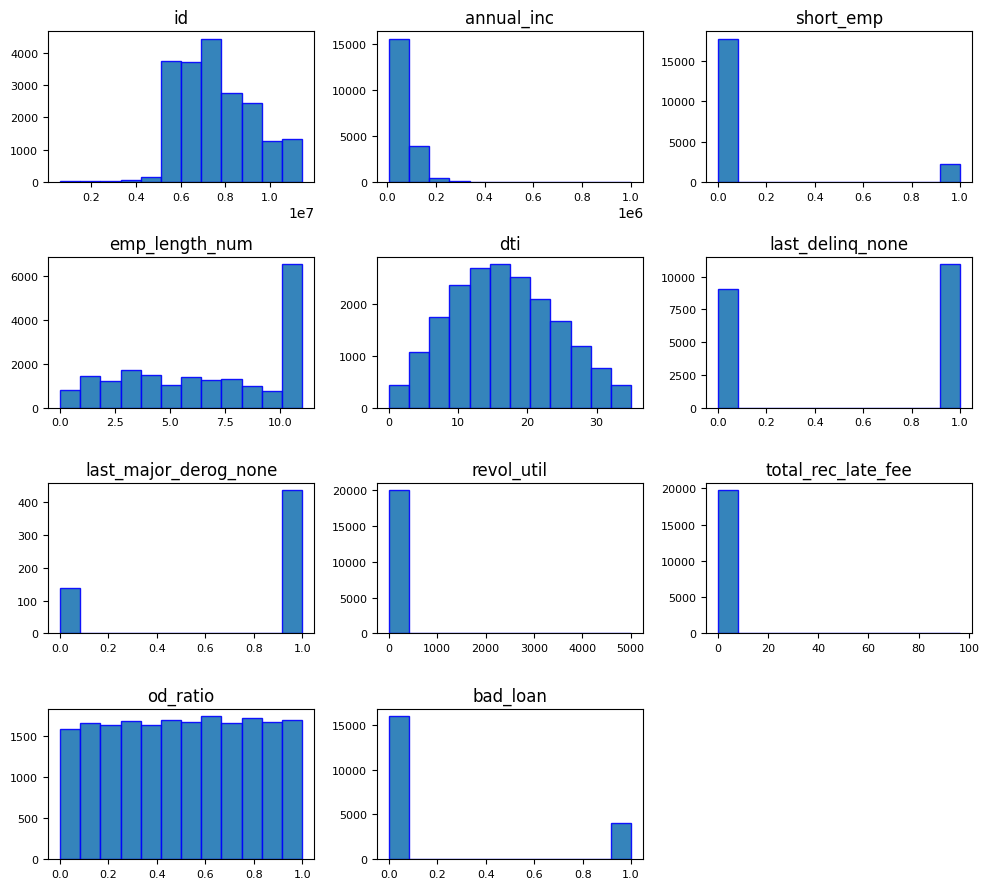

In [436]:
data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

# Visualization of the categoric distribution:

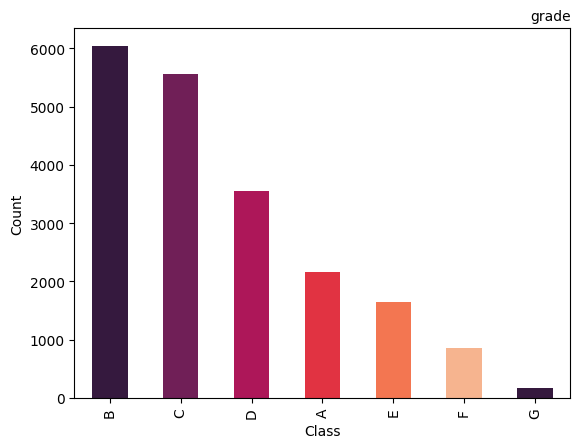

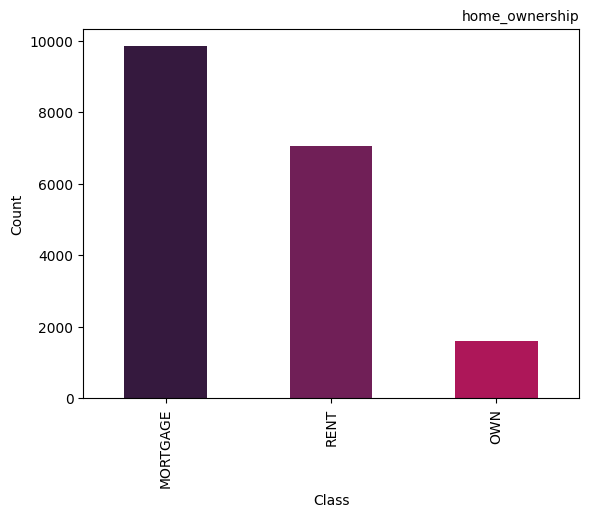

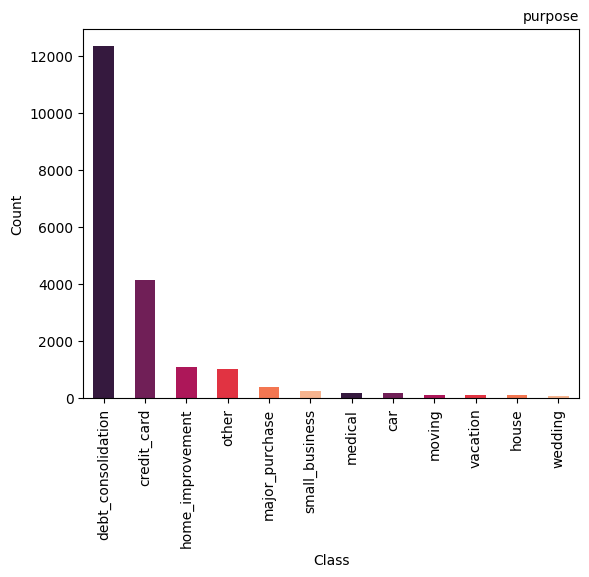

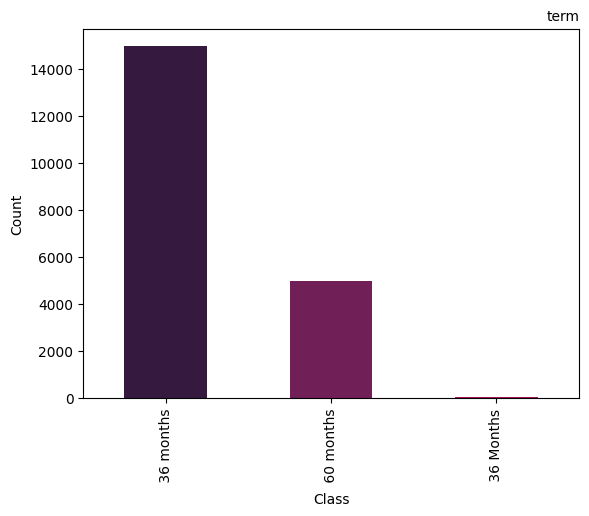

In [437]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

It seems there is a typo in the ’36 Months’ class on the variable ‘term’. Let’s fix it by lowering the capitalized characters.

In [438]:
data.term = data.term.str.lower()
data.term.value_counts()

 36 months    15001
 60 months     4999
Name: term, dtype: int64

# Feature: grade
LC assigned loan grade.

Variable: grade
Type of variable: object
Total observations: 20000
Missing values? False
Unique values: 7
List of unique values: ['A' 'D' 'E' 'B' 'G' 'C' 'F']


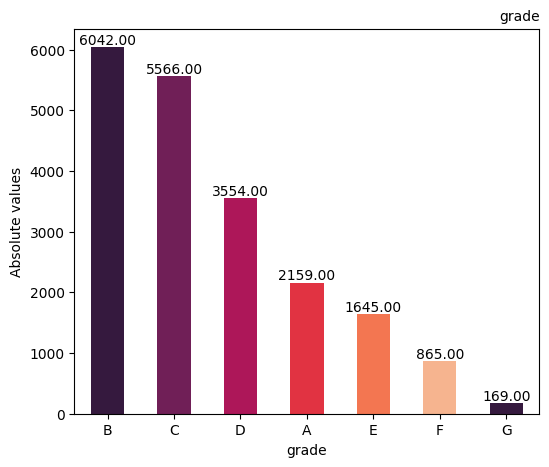

In [439]:
stats("grade")
bar("grade")


home_ownership,MORTGAGE,OWN,RENT
grade,,,
A,10125413622,1317629640,4051026441
B,23885885410,3462708590,14760476369
C,20610251432,3556938433,15150732416
D,11302570597,2341863113,11151017359
E,5710749816,1018416369,4929639589
F,2609177317,666981482,2724192127
G,536342691,109804609,529908890


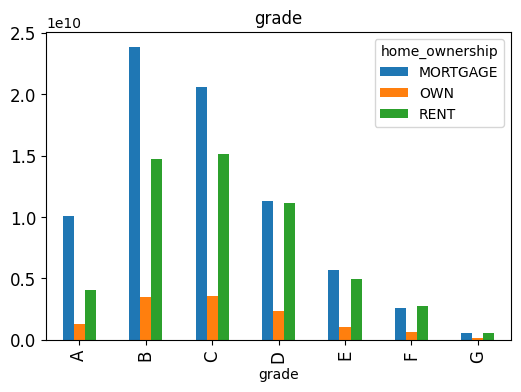

In [440]:
pivot_sum("home_ownership","grade","id")

When the grade classes decrease, the type of homeownership tends to shift from mortgage to rent. It is on grades B, C, and D that we see the type of own propriety as the highest class.

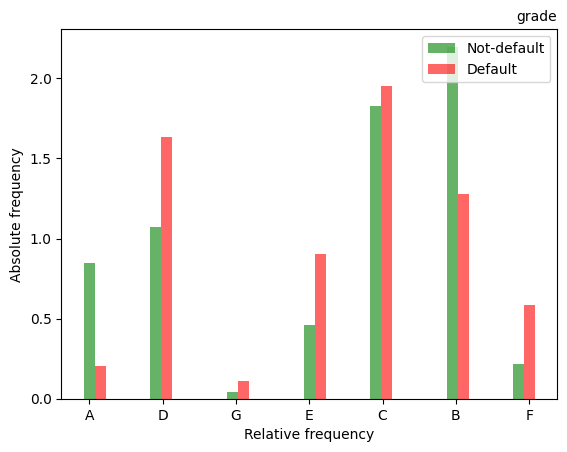

In [441]:
target("grade")

It is between the upper-grade classes that the highest not-default loans happen.

#Feature: annual_inc

The self-reported annual income provided by the borrower during registration.

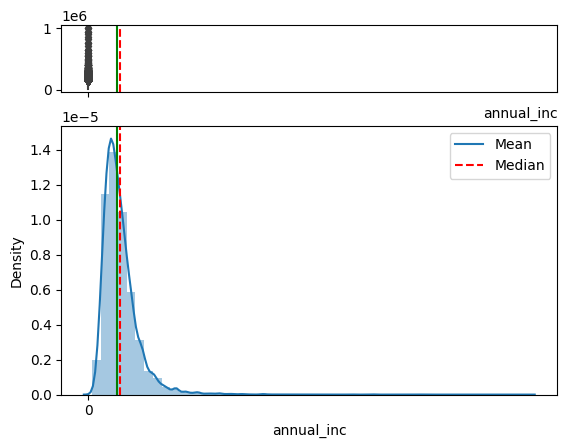

In [442]:
boxhist("annual_inc")

Variable: annual_inc
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 2566
Min: 8412
25%: 47000
Median: 65000
75%: 88000
Max: 1000000
Mean: 73349.57835
Std dev: 45198.567254725625
Variance: 2042910481.8799553
Skewness: 5.275648123592321
Kurtosis: 66.72665803201564

Percentiles 1%, 5%, 95%, 99%


0.01     20519.5
0.05     30000.0
0.95    145000.0
0.99    225000.0
Name: annual_inc, dtype: float64

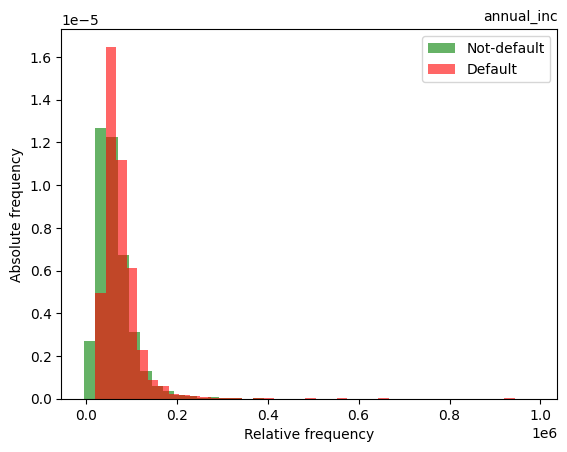

In [443]:
stats("annual_inc")
target("annual_inc")

The histogram tells us that the higher the income, the higher is the trend of default.

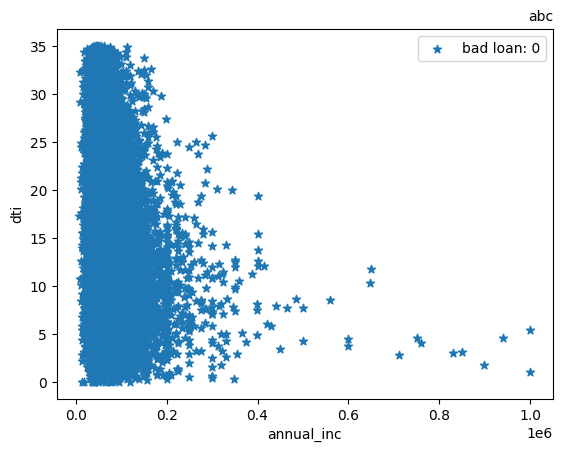

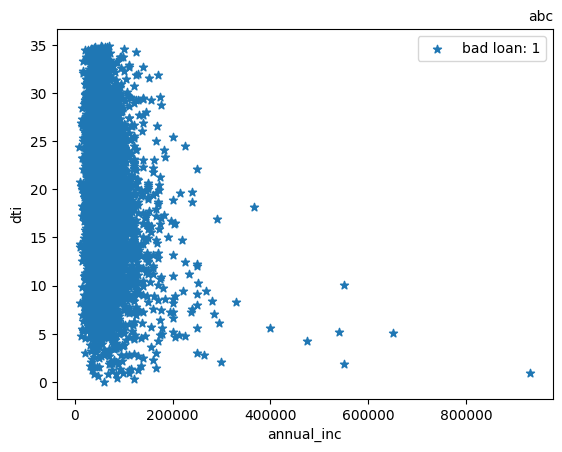

In [444]:
scatter("annual_inc","dti")

The scatterplot shows a weak and negative association between ‘annual income’ and ‘debt to income ratio’.

In [445]:
corr = data['annual_inc'].corr(data['dti'], method='pearson')

print('Pearson correlation coefficient:', corr)

Pearson correlation coefficient: -0.23021873671131823


The correlation value is of -0.23 meaning as the annual_inc decreases, the loans at instance 1 (default/ not paid) increases.
#Feature: short_emp

1 when employed for 1 year or less.

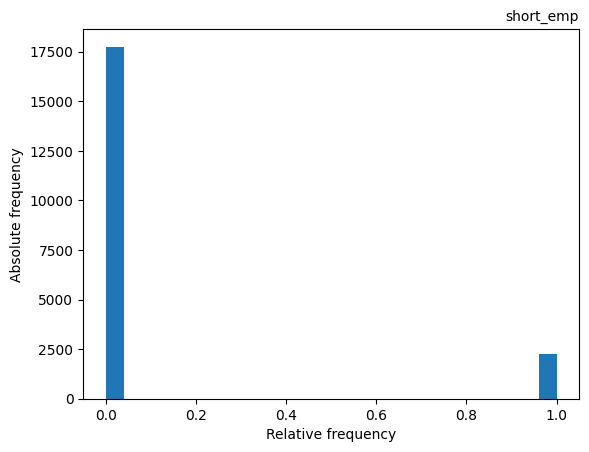

In [446]:
hist("short_emp")

The clients that have been employed for one or less years (instance 1) represent 11.25% whereas 88.75% of the clients were employed for more than 1 year.

Variable: short_emp
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 2
Min: 0
25%: 0
Median: 0
75%: 0
Max: 1
Mean: 0.1125
Std dev: 0.31598851630577
Variance: 0.09984874243712187
Skewness: 2.4526820936006293
Kurtosis: 4.015649452269171

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: short_emp, dtype: float64

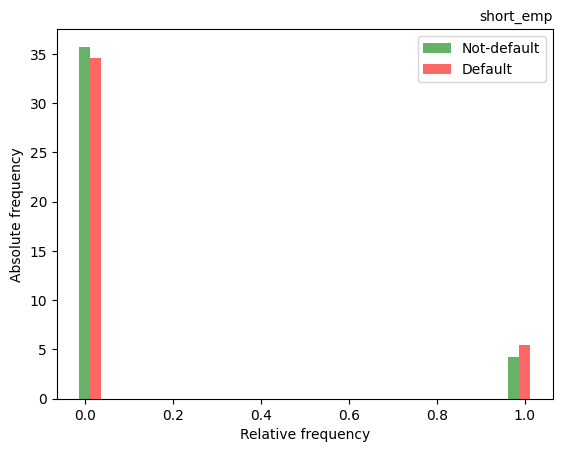

In [447]:
stats("short_emp")
target("short_emp")

The segment employed for less than 1 year had loans on default more frequently than the other segment.

#Feature: emp_length_num
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

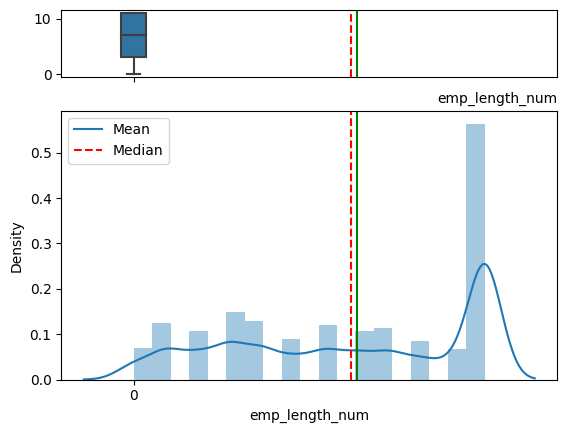

In [448]:
boxhist("emp_length_num")

Variable: emp_length_num
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 12
Min: 0
25%: 3
Median: 7
75%: 11
Max: 11
Mean: 6.8214
Std dev: 3.7742302898358013
Variance: 14.244814280714037
Skewness: -0.27964924120655704
Kurtosis: -1.3664296257576731

Percentiles 1%, 5%, 95%, 99%


0.01     0.0
0.05     1.0
0.95    11.0
0.99    11.0
Name: emp_length_num, dtype: float64

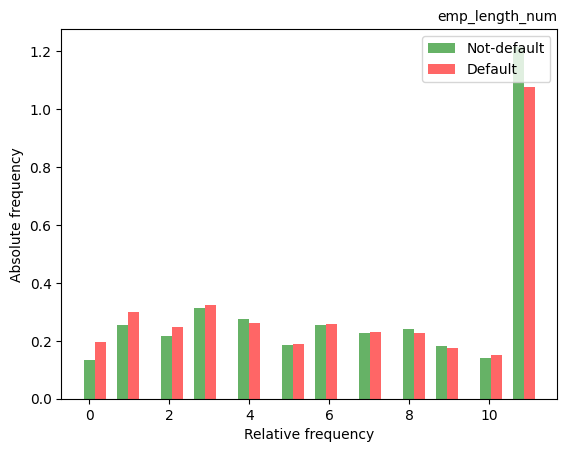

In [449]:
stats("emp_length_num")
target("emp_length_num")

With a few exceptions, it’s amongst nonstop employed clients for more than 10 years that the not-default loans occur.



bad_loan,0,1
purpose,,
car,5.760870,4.500000
credit_card,6.715284,6.357550
debt_consolidation,7.028006,6.603143
home_improvement,7.073281,6.870813
house,5.802326,4.933333
major_purchase,6.269625,6.081395
medical,6.904412,6.435897
moving,5.827957,4.133333
other,6.803213,6.609489


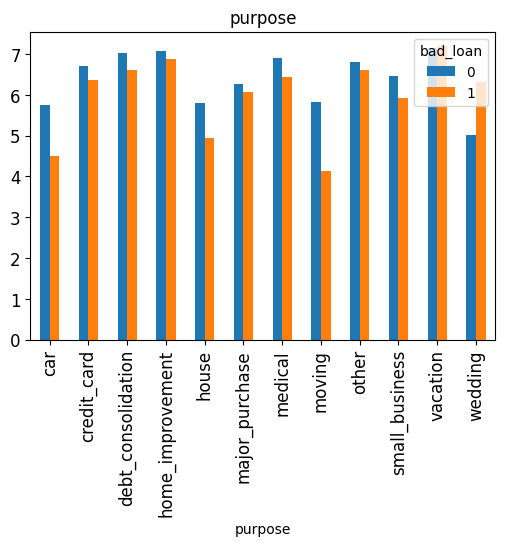

In [450]:
pivot_mean("bad_loan", "purpose", "emp_length_num")

Wedding and vacation are the two purposes in which, on average, the majority of loans ended up not been paid.

#Feature: home_ownership
Type of home ownership.

Variable: home_ownership
Type of variable: object
Total observations: 20000
Missing values: 1491 (7.46%)
Unique values: 3
List of unique values: ['RENT' 'OWN' 'MORTGAGE' nan]


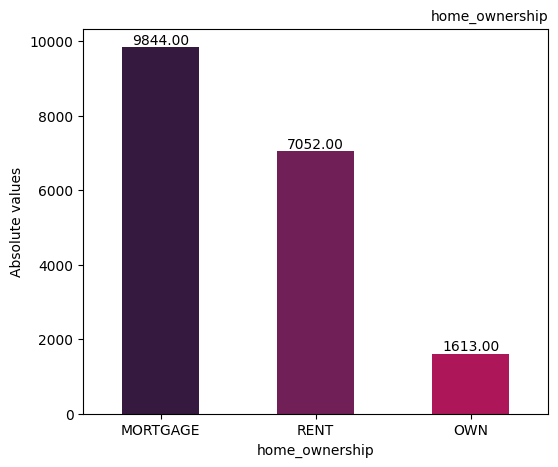

In [451]:
stats("home_ownership")
bar("home_ownership")

,Freq abs,percent %
MORTGAGE,9844,53.18
RENT,7052,38.10
OWN,1613,8.71
NaN,1491,NaN


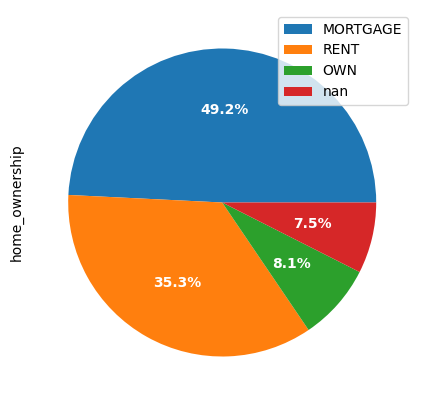

In [452]:
pie("home_ownership")

bad_loan,0,1
home_ownership,,
MORTGAGE,62024618628,12755772257
OWN,10069692998,2404649238
RENT,40735387375,12561605816


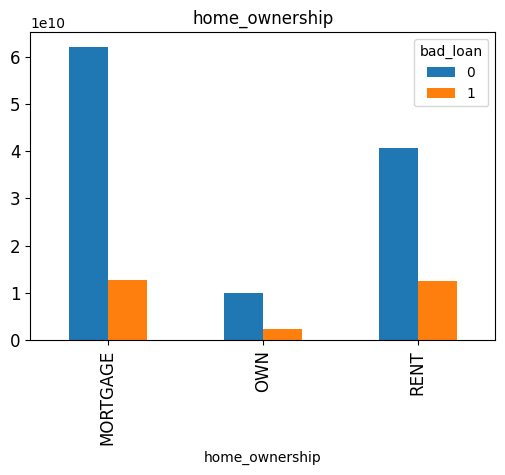

In [453]:
pivot_sum("bad_loan", "home_ownership", "id")

Proportionally, there is no major difference between the type of homeownership and the default loans.

#Feature: dti (debt-to-income)

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

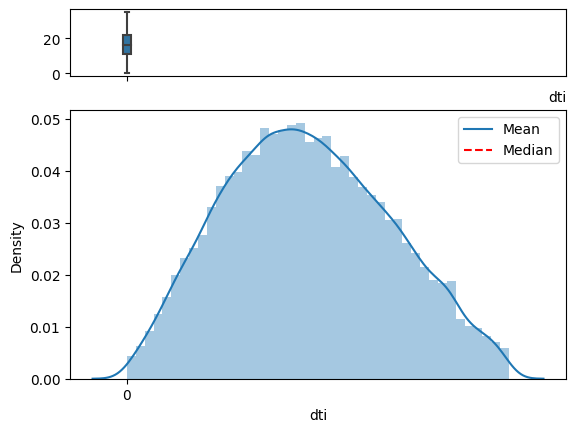

In [454]:
boxhist("dti")

Variable: dti
Type of variable: float64
Total observations: 20000
Missing values: 154 (0.77%)
Unique values: 3295
Min: 0
25%: 10
Median: 16
75%: 22
Max: 34
Mean: 16.58784137861534
Std dev: 7.585811951545173
Variance: 57.54454296420559
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01     1.7800
0.05     4.6500
0.95    29.6900
0.99    33.4355
Name: dti, dtype: float64

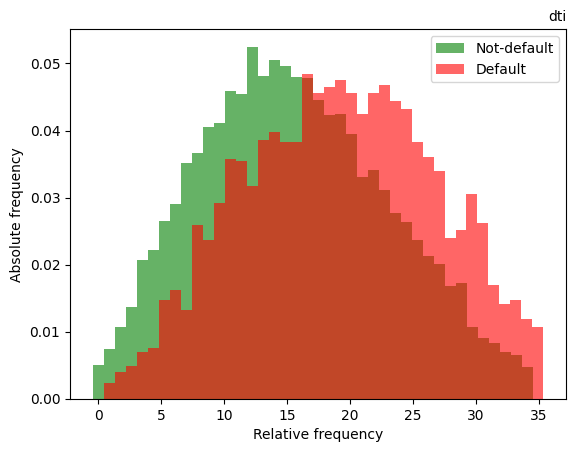

In [455]:
stats("dti")
target("dti")

The distribution of bad loans (default) has, on average, higher ‘dti’ values (debt to income ratio) in comparison with the good loans. The trend is: the higher the effort rate, the more frequently are the loans on default.

home_ownership,MORTGAGE,OWN,RENT
purpose,,,
car,863.18,362.36,837.01
credit_card,33224.36,5383.50,25230.23
debt_consolidation,103013.35,16068.56,74421.50
home_improvement,10866.29,2020.66,922.21
house,386.92,134.76,718.56
major_purchase,2081.56,519.82,2204.26
medical,1186.83,194.44,1047.97
moving,280.34,122.21,1236.81
other,6840.32,1656.78,6584.84


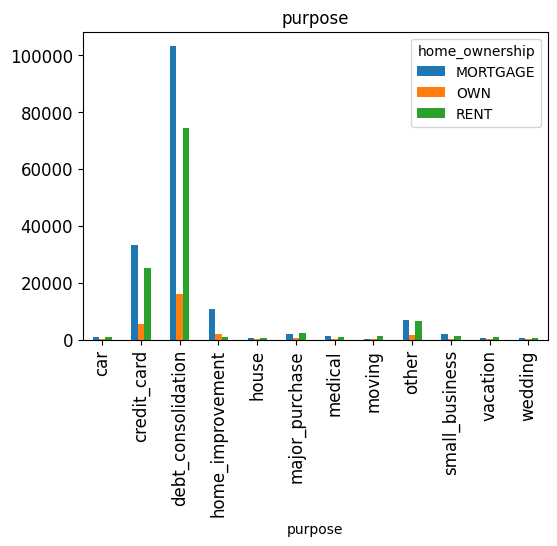

In [456]:
pivot_sum("home_ownership", "purpose", "dti")

It is notorious that the main purpose for the requested loans is ‘debt consolidation’ followed by ‘credit card’, for ‘mortage’ and ‘own’ as types of home ownership by more than 6000 and 4000 people respectivelly.

On the other hand, ‘moving’ and ‘wedding’ and the purpose less declared by 19 and 47 in both same segments of type of ownership. For those who live in a rented place, the number of people who requests loans is substancially inferior, proporcionally.

bad_loan,0,1
grade,,
A,28585.16,2130.11
B,81890.81,13859.61
C,72020.76,21883.30
D,43094.93,18423.00
E,18820.49,10220.30
F,8621.77,6686.74
G,1752.69,1212.63


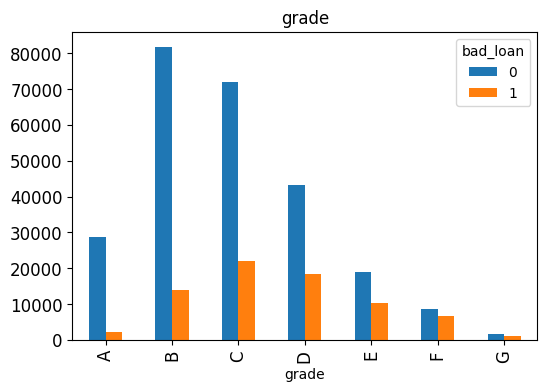

In [457]:
pivot_sum("bad_loan", "grade", "dti")

The trend is when the grade classes decrease, the probability of a default loan increases.

#Feature: purpose

A category provided by the borrower for the loan request.

Variable: purpose
Type of variable: object
Total observations: 20000
Missing values? False
Unique values: 12
List of unique values: ['credit_card' 'debt_consolidation' 'medical' 'other' 'home_improvement'
 'small_business' 'major_purchase' 'vacation' 'car' 'house' 'moving'
 'wedding']


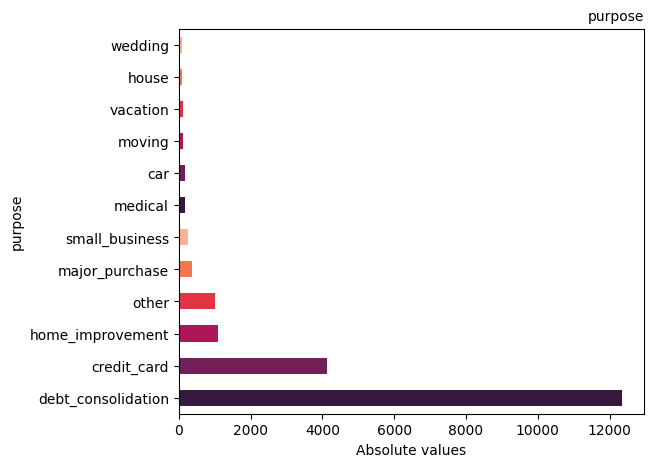

In [458]:
stats("purpose")
barh("purpose")


bad_loan,0,1
purpose,,
car,1070129314,216325988
credit_card,26386780714,5340476464
debt_consolidation,75102879435,18555640551
home_improvement,6644887055,1502903381
house,637766829,103586113
major_purchase,2178415440,660763827
medical,1073061905,307640771
moving,701823712,219651796
other,5725665050,1988147906


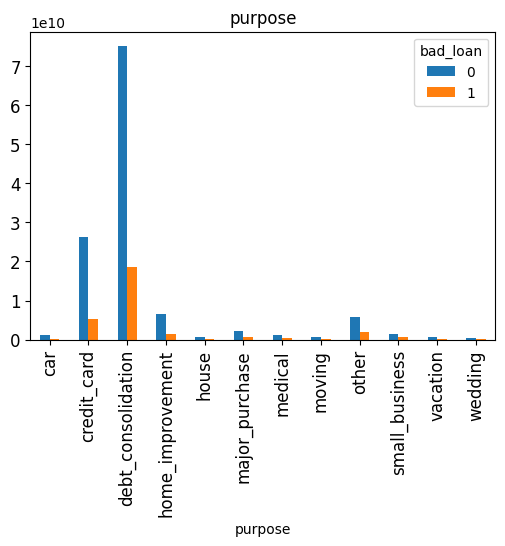

In [459]:
pivot_sum("bad_loan", "purpose", "id")

#Feature: term
The number of payments on the loan. Values are in months and can be either 36 or 60

,Freq abs,percent %
36 months,15001,75.0
60 months,4999,25.0


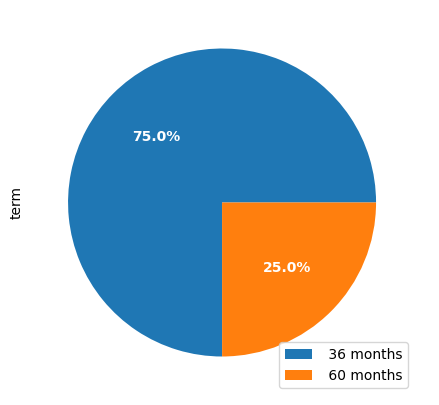

In [460]:
pie("term")

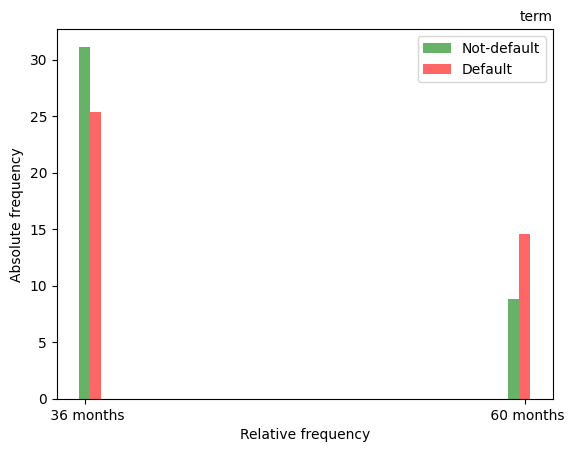

In [461]:
target("term")

Default loans occur inversely and more frequently over a 60 months term period.

term,36 months,60 months
grade,,
A,83456.905553,89204.942308
B,71353.945618,80193.794444
C,68697.487576,77522.113440
D,65478.678457,80732.477486
E,69688.921136,80009.862512
F,72240.582734,77307.279614
G,122857.142857,89206.913580


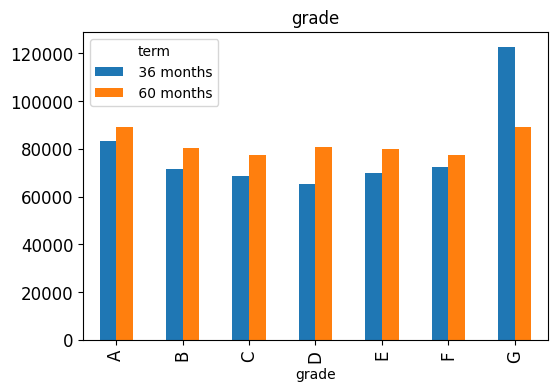

In [462]:
pivot_mean("term", "grade", "annual_inc")

On average, the 36 months term is the most common amongst clients with the highest debt-to-income that belong to the lowest grade class.

#Feature: last_delinq_none

1 when the borrower had at least one event of delinquency.

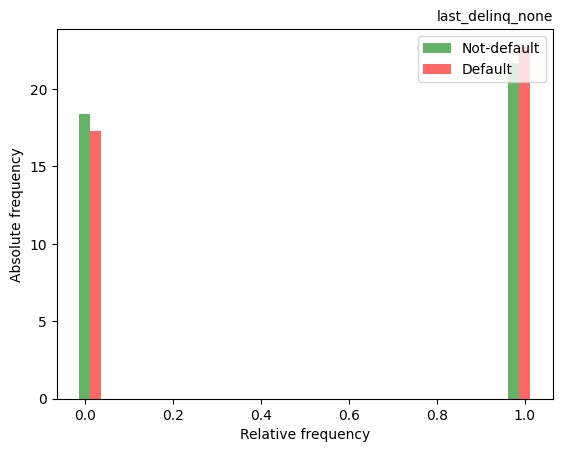

In [463]:
target("last_delinq_none")


,Freq abs,percent %
1,10932,54.66
0,9068,45.34


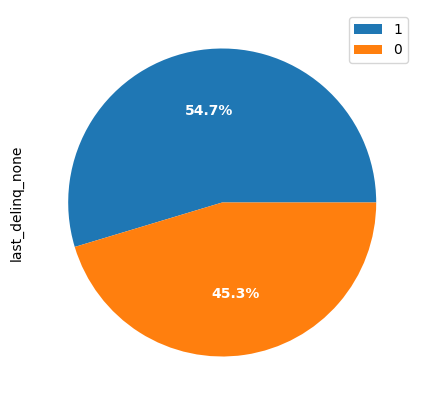

In [464]:
pie("last_delinq_none")

Variable: last_delinq_none
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 2
Min: 0
25%: 0
Median: 1
75%: 1
Max: 1
Mean: 0.5466
Std dev: 0.49783614979388763
Variance: 0.24784083204160212
Skewness: -0.18721487004502552
Kurtosis: -1.9649505924340243

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: last_delinq_none, dtype: float64

bad_loan,0,1
purpose,,
car,0.615942,0.433333
credit_card,0.578748,0.599715
debt_consolidation,0.529072,0.566479
home_improvement,0.524239,0.516746
house,0.558140,0.733333
major_purchase,0.569966,0.511628
medical,0.514706,0.487179
moving,0.602151,0.566667
other,0.514056,0.569343


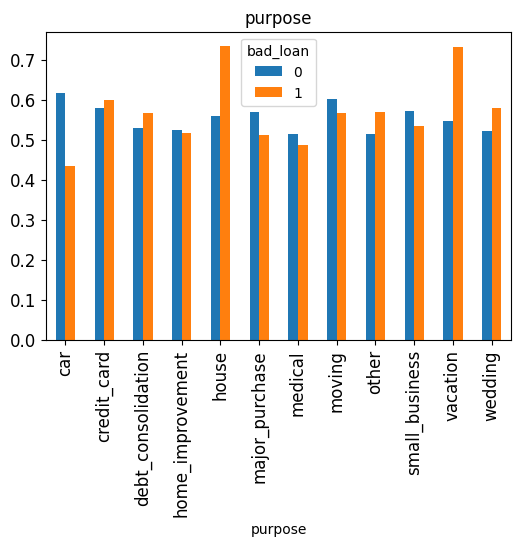

In [465]:
stats("last_delinq_none")
pivot_mean("bad_loan","purpose","last_delinq_none")

Loans on default are, on average, the more frequent between loans’ purposes such as vacation and house.

#Feature: last_major_derog_none
1 borrower had at least 90 days of a bad rating.

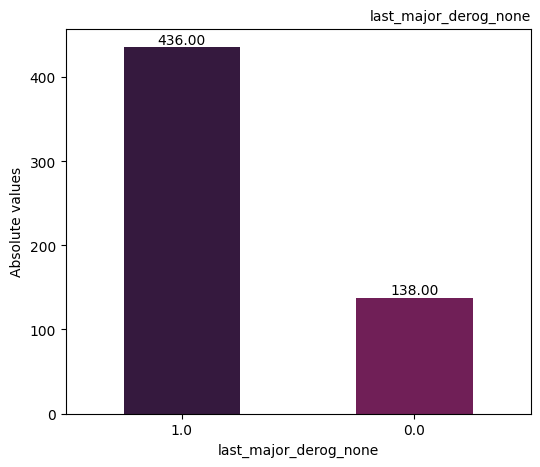

In [466]:
bar("last_major_derog_none")

Variable: last_major_derog_none
Type of variable: float64
Total observations: 20000
Missing values: 19426 (97.13%)
Unique values: 2
Min: 0
25%: 1
Median: 1
75%: 1
Max: 1
Mean: 0.759581881533101
Std dev: 0.42771012441406686
Variance: 0.18293595052629658
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: last_major_derog_none, dtype: float64

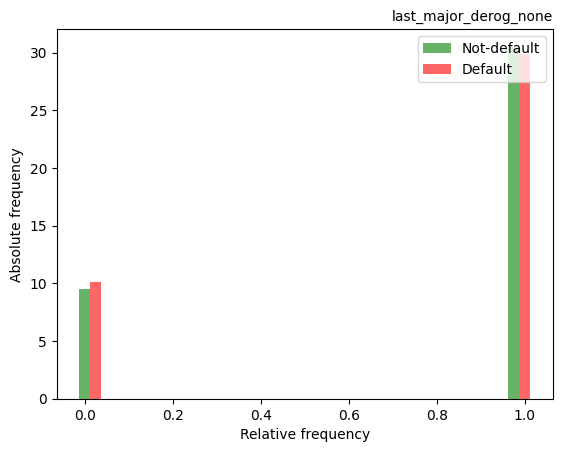

In [467]:
stats("last_major_derog_none")

target("last_major_derog_none")

#Feature: revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

Variable: revol_util
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 1030
Min: 0
25%: 38
Median: 57
75%: 73
Max: 5010
Mean: 55.958148054999995
Std dev: 42.11745587221629
Variance: 1773.8800891480867
Skewness: 81.32716395041949
Kurtosis: 9569.242123791564

Percentiles 1%, 5%, 95%, 99%


0.01     2.699
0.05    14.500
0.95    91.800
0.99    97.300
Name: revol_util, dtype: float64

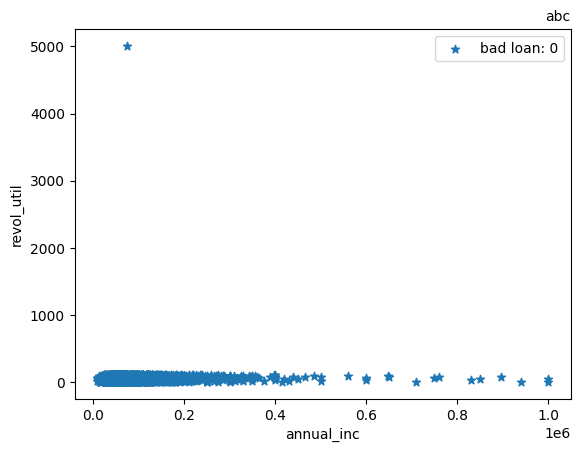

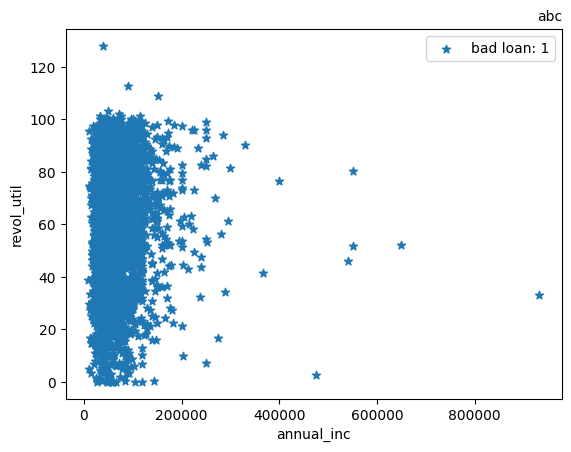

In [468]:
stats("revol_util")

scatter("annual_inc", "revol_util")

The lowest the clients’ annual income, the highest the amount of credit the borrower is using relative to all available revolving credit.

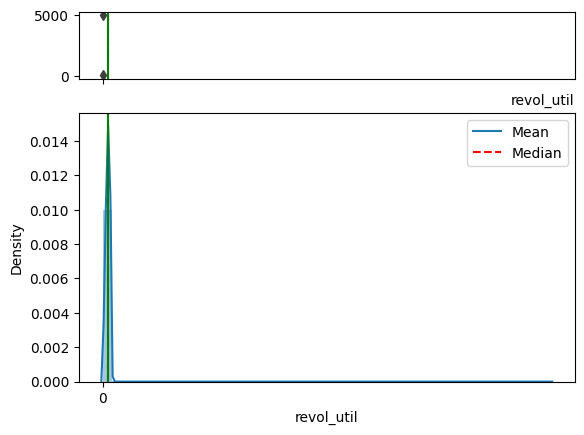

In [469]:
boxhist("revol_util")

#Feature: total_rec_late_fee
Late fees received to date

Variable: total_rec_late_fee
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 166
Min: 0
25%: 0
Median: 0
75%: 0
Max: 96
Mean: 0.29062164
Std dev: 3.108654416644896
Variance: 9.663732282125817
Skewness: 14.299156408331024
Kurtosis: 262.30322072057277

Percentiles 1%, 5%, 95%, 99%


0.01     0.0
0.05     0.0
0.95     0.0
0.99    15.0
Name: total_rec_late_fee, dtype: float64

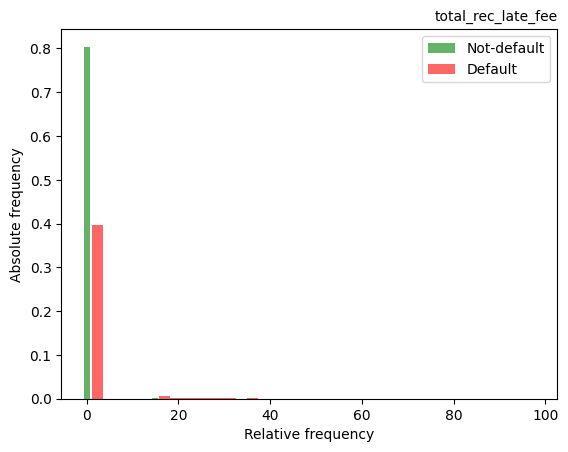

In [470]:
stats("total_rec_late_fee")

target("total_rec_late_fee")

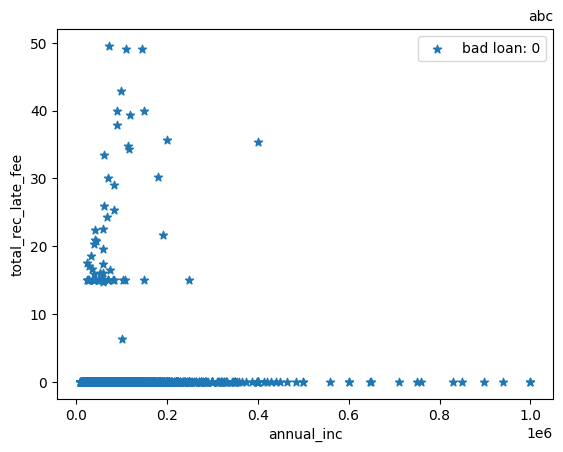

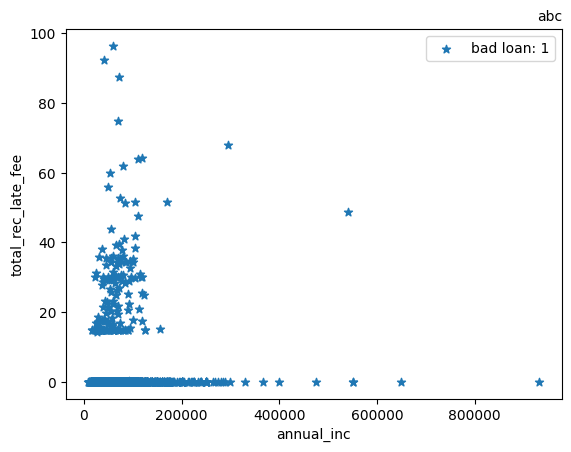

In [471]:
scatter("annual_inc", "total_rec_late_fee")

In [472]:
corr = data['total_rec_late_fee'].corr(data['annual_inc'], method='pearson')

print('Pearson correlation coefficient:', corr)

Pearson correlation coefficient: 0.014712823670216547


The customers with the lowest annual income are the ones that have more late fees, especially the highest and heavy ones.

bad_loan,0,1
purpose,,
car,0.000000,0.000000
credit_card,0.087120,0.754202
debt_consolidation,0.067130,1.087271
home_improvement,0.146776,1.556608
house,0.174419,6.594467
major_purchase,0.254948,0.871894
medical,0.110294,1.460797
moving,0.161290,0.999413
other,0.080293,1.120423


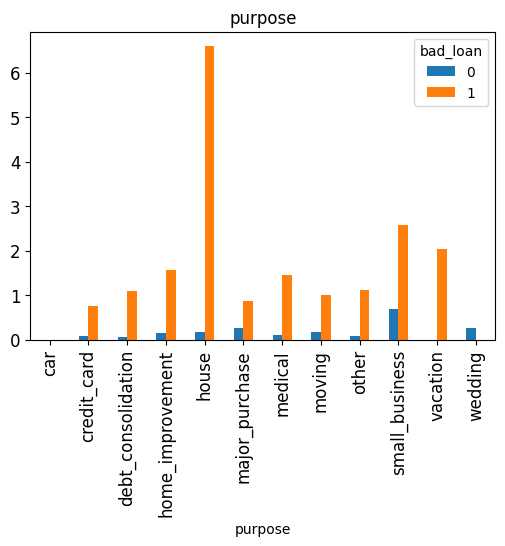

In [473]:
pivot_mean("bad_loan", "purpose", "total_rec_late_fee")


The late fees occur in a higher frequency amongst loan purposes such as a house, small business, or vacation. On the other hand, wedding and car are the credit purposes with the lowest late fees execution.

#Feature: od_ratio

Overdraft ratio.

Variable: od_ratio
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 20000
Min: 0
25%: 0
Median: 0
75%: 0
Max: 0
Mean: 0.5044303048872462
Std dev: 0.2877201586666061
Variance: 0.08278288970313698
Skewness: -0.02052095981509438
Kurtosis: -1.1914529752985776

Percentiles 1%, 5%, 95%, 99%


0.01    0.009887
0.05    0.051495
0.95    0.951616
0.99    0.990142
Name: od_ratio, dtype: float64

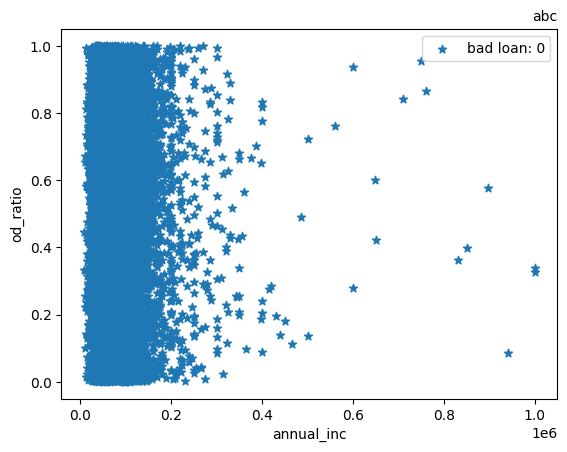

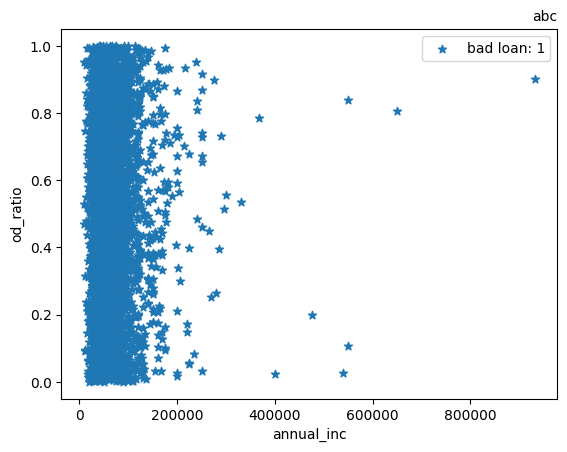

In [474]:
stats("od_ratio")

scatter("annual_inc", "od_ratio")

There is a higher overdraft rate between clients with the lowest annual income, the same applicants involved with the most frequent defaulted loans.

bad_loan,0,1
term,,
36 months,6292.986498,1278.090039
60 months,1776.969682,740.559880


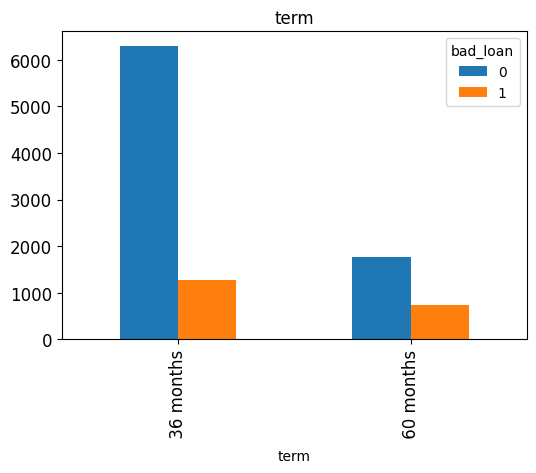

In [475]:
pivot_sum("bad_loan", "term", "od_ratio")

Proportionally, overdraft ratios are higher on a 60-month term amongst defaulted loans.

#Feature: bad_loan

1 when a loan was not paid.

Variable: bad_loan
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 2
Min: 0
25%: 0
Median: 0
75%: 0
Max: 1
Mean: 0.2
Std dev: 0.4000100003750157
Variance: 0.16000800040002006
Skewness: 1.4999999999999996
Kurtosis: 0.24999999999999956

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: bad_loan, dtype: float64

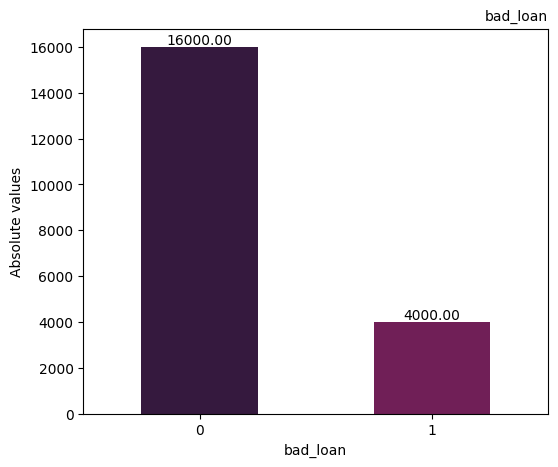

In [476]:
stats("bad_loan")

bar("bad_loan")

#CORRELATIONS
Heatmap → Pearson method

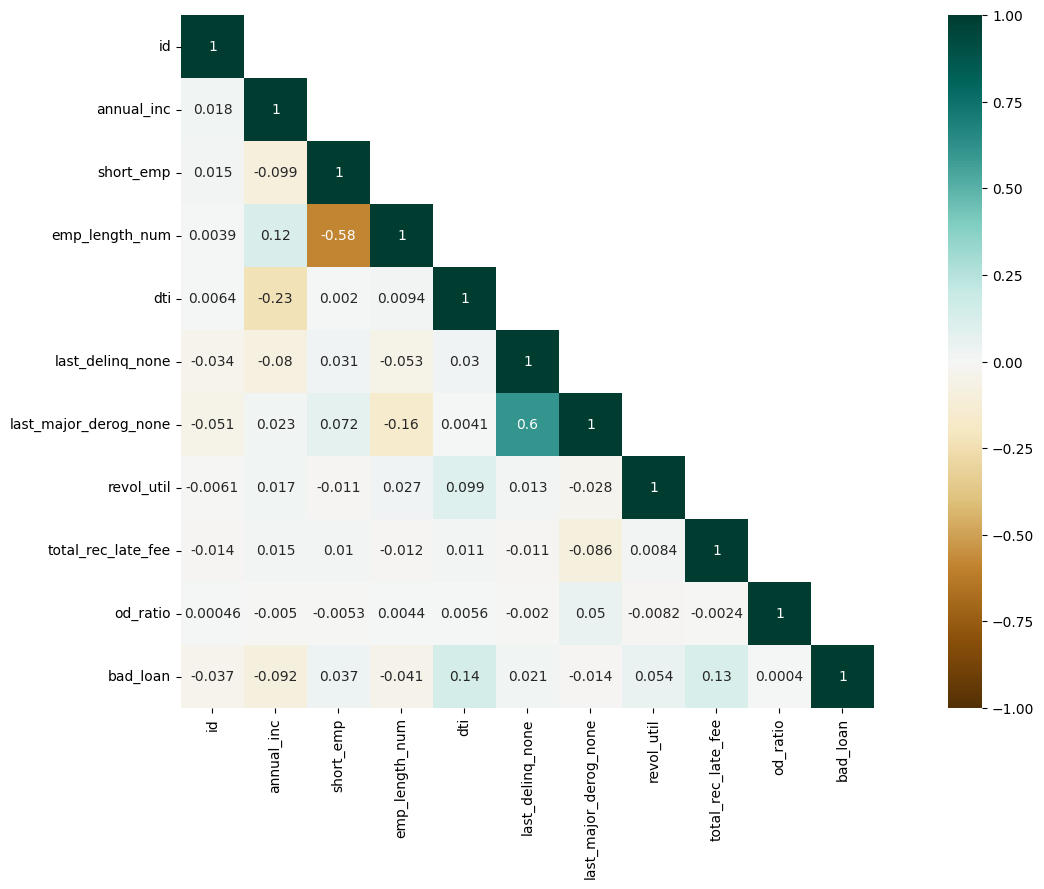

In [477]:
mask = np.triu(data.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

The heatmap shows there are some positive and negative correlations amongst variables.

Let’s now find out which numerical features are the most correlated with the target.

In [478]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [479]:
import pingouin as pg

In [480]:
bad_loan_c = pg.pairwise_corr(data, columns=['bad_loan'], method='pearson').loc[:,['X','Y','r']]
bad_loan_c.sort_values(by=['r'], ascending=False)

,X,Y,r
4,bad_loan,dti,0.141884
8,bad_loan,total_rec_late_fee,0.130233
7,bad_loan,revol_util,0.053682
2,bad_loan,short_emp,0.037186
5,bad_loan,last_delinq_none,0.021494
9,bad_loan,od_ratio,0.000403
6,bad_loan,last_major_derog_none,-0.013770
0,bad_loan,id,-0.037307
3,bad_loan,emp_length_num,-0.041420
1,bad_loan,annual_inc,-0.092402


The variable that is most correlated with the target is ‘dti’ with a weak and positive correlation of 0.141884.

# Heatmap → Spearman method

In [481]:
data_spear = data.copy()
data_spear.drop(["bad_loan"], axis=1, inplace=True)
spearman_rank = pg.pairwise_corr(data_spear, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
display(con.reset_index(drop=True))

,X,Y,r
0,last_delinq_none,last_major_derog_none,0.603267
1,annual_inc,emp_length_num,0.178792
2,dti,revol_util,0.176115
3,short_emp,last_major_derog_none,0.072290
4,annual_inc,revol_util,0.062358
5,annual_inc,last_delinq_none,-0.101568
6,annual_inc,short_emp,-0.137179
7,emp_length_num,last_major_derog_none,-0.160225
8,annual_inc,dti,-0.223426
9,short_emp,emp_length_num,-0.557925


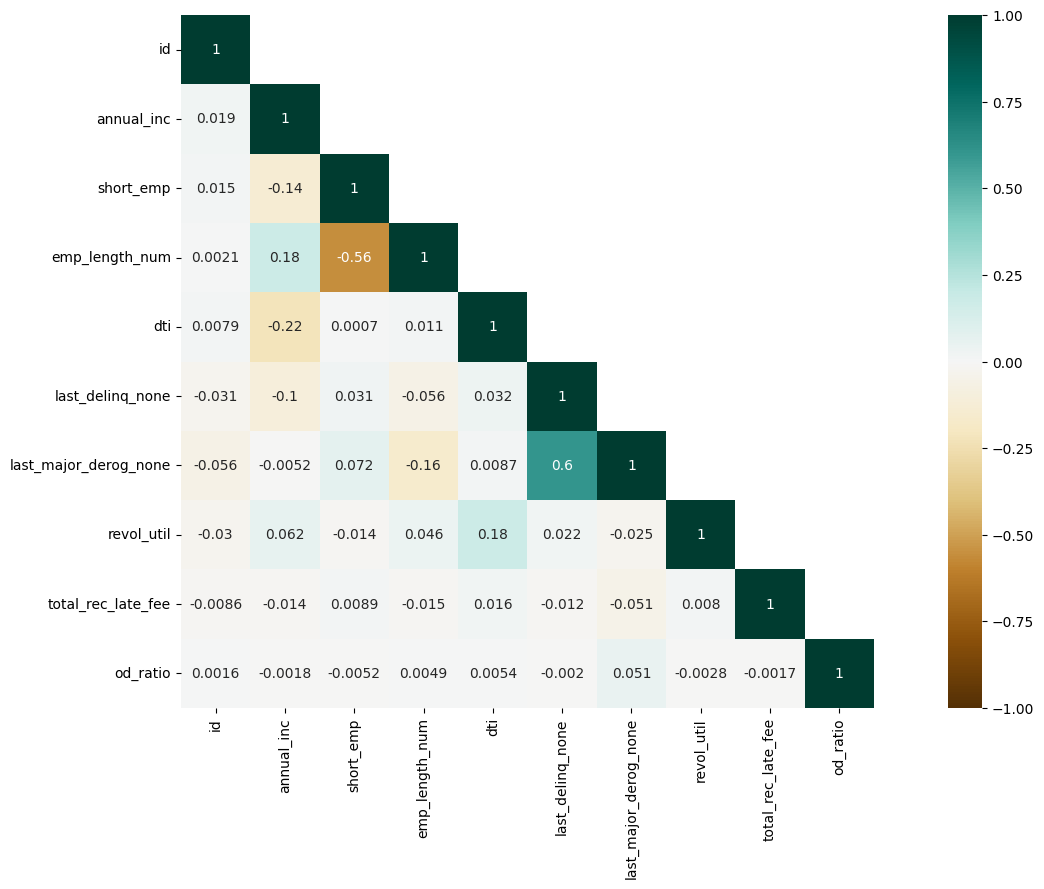

In [482]:
mask = np.triu(data_spear.corr(method='spearman'), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(data_spear.corr(method='spearman'), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

By plotting a heatmap — spearman method — it’s easy to understand that the variables ‘last_major_derog_none’ and ‘last_delinq_none’ are the two most correlated features with the highest monotonic relationship (60%). Nevertheless, ‘last_major_derog_none’ has 19426 missing values (97%), which is too much.

In this scenario, the column ‘last_major_derog_none’ is to be dropped as well as all the nan values from the dataset. Thus, the next most correlated variables would be ‘emp_length_num’ and ‘short_emp’, with a Spearman value of -55%.

#Data Wrangling: Cleansing and Feature Selection
##OUTLIERS
Let’s examine the data and check for any outliers.
Starting by selecting and filtering numeric and categoric data

In [483]:
data_ca = data.select_dtypes(exclude=["int64","float64"]).copy()
data_nu = data.select_dtypes(exclude=["object","category"]).copy()

# Boxplot: 
Visualizing the numeric data dispersion

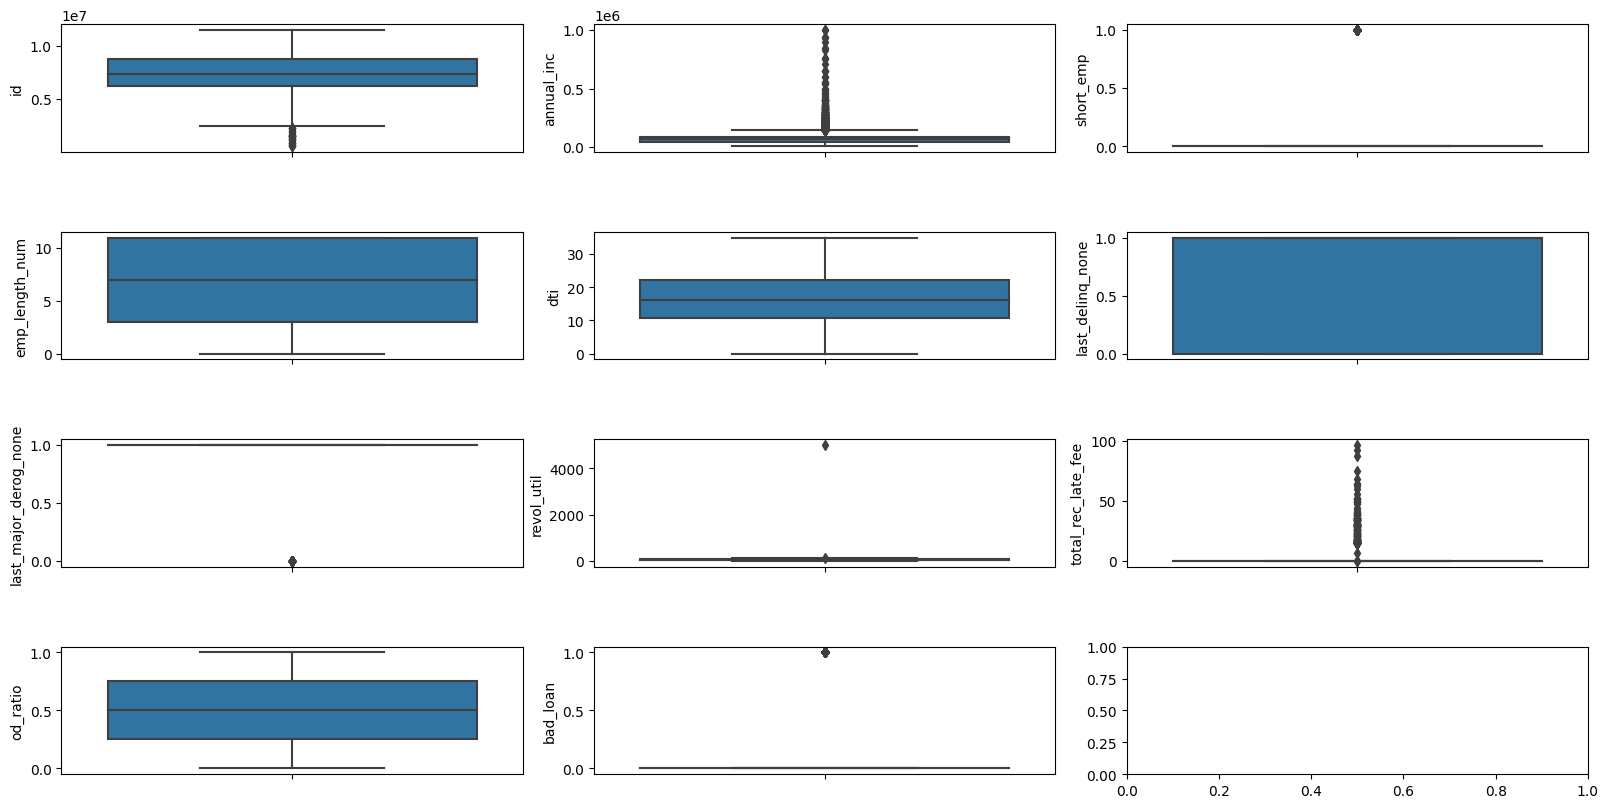

In [484]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(16, 8))
index = 0
axs = axs.flatten()
for k,v in data_nu.items():
    sns.boxplot(y=k, data=data_nu, ax=axs[index], orient="h")
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [485]:
display(data.describe().loc[["mean","50%","std"]].loc[:,["annual_inc","revol_util","total_rec_late_fee"]])

,annual_inc,revol_util,total_rec_late_fee
mean,73349.578350,55.958148,0.290622
50%,65000.000000,57.100000,0.000000
std,45198.567255,42.117456,3.108654


Definitely, there are some outliers in the variables ‘annual_inc’, ‘revol_util’ and ‘total_rec_late_fee’. Let’s detect and solve them.

#‘annual_inc’

count      20000.000000
mean       73349.578350
std        45198.567255
min         8412.000000
25%        47000.000000
50%        65000.000000
75%        88000.000000
max      1000000.000000
Name: annual_inc, dtype: float64


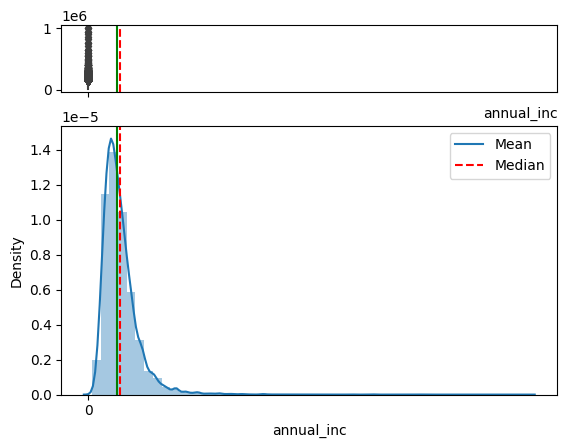

In [486]:
print(data.annual_inc.describe())
boxhist("annual_inc")

The graph and the boxplot suggests this variable has too many data points outside the upper quartile. Outliers are plotted as those individual points beyond the boxplot whiskers. The method used here is the IQR score.

count     19074.000000
mean      66792.117857
std       27241.646991
min        8412.000000
25%       46000.000000
50%       62000.000000
75%       84000.000000
max      149000.000000
Name: annual_inc, dtype: float64


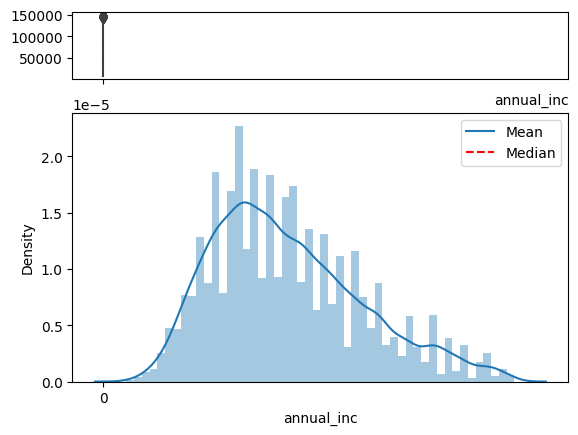

In [487]:
# Dealing with the outliers through IQR score method
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
data['annual_inc'] = data.annual_inc[~((data.annual_inc < (Q1 - 1.5 * IQR)) |(data.annual_inc > (Q3 + 1.5 * IQR)))]
print(data.annual_inc.describe())

boxhist("annual_inc")

In [488]:
print(int(data_nu.annual_inc.describe()[0]) - int(data.annual_inc.describe()[0]),"outliers were removed with this operation.")

926 outliers were removed with this operation.


‘revol_util’


count    20000.000000
mean        55.958148
std         42.117456
min          0.000000
25%         38.800000
50%         57.100000
75%         73.900000
max       5010.000000
Name: revol_util, dtype: float64


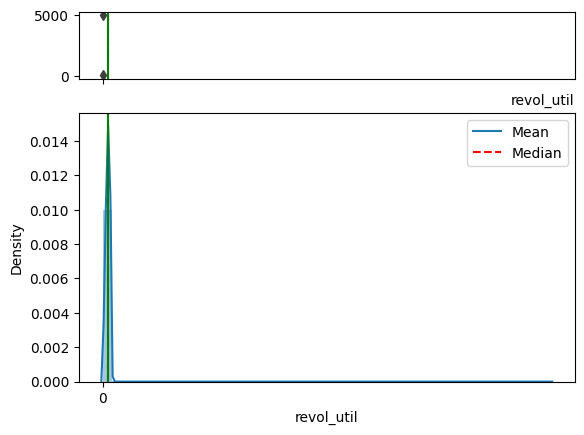

In [489]:
print(data.revol_util.describe())
boxhist("revol_util")

The graph and the boxplot analisys suggests that this variable has one data point far away from the upper quartile.

Outliers are plotted as those individual points beyond the boxplot whiskers but that doesn’t mean that every single data point outside the lower and upper quartiles are indeed outliers.

Better check it out and possibly remove that single outlier.

count    19999.000000
mean        55.710434
std         23.380722
min          0.000000
25%         38.800000
50%         57.100000
75%         73.900000
max        128.100000
Name: revol_util, dtype: float64


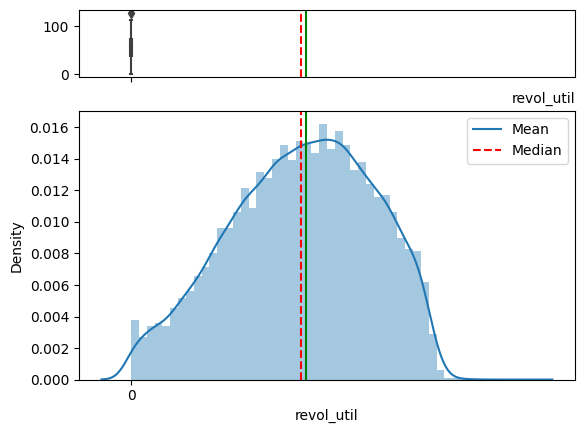

In [490]:
# Dealing with the 5010.0 outlier
value = data.revol_util.quantile([.99999])
p = value.iloc[0]
data = data[data["revol_util"] < p]
print(data['revol_util'].describe())

boxhist("revol_util")

In [491]:
print(int(data_nu.revol_util.describe()[0]) - int(data.revol_util.describe()[0]),"outlier was removed with this operation.")


1 outlier was removed with this operation.


#‘total_rec_late_fee’
Visualizing the data dispersion:

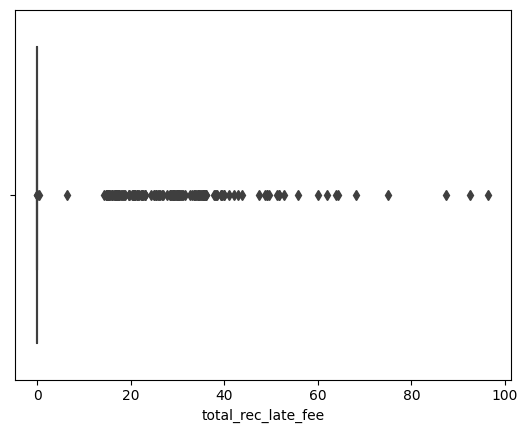

In [492]:
sns.boxplot(x=data['total_rec_late_fee'],data=data)
plt.xlabel('total_rec_late_fee', fontsize=10)
plt.show()

#Removing outlier:

In [493]:
value = data.total_rec_late_fee.quantile([.989])
p = value.iloc[0]
data = data[data["total_rec_late_fee"] < p]


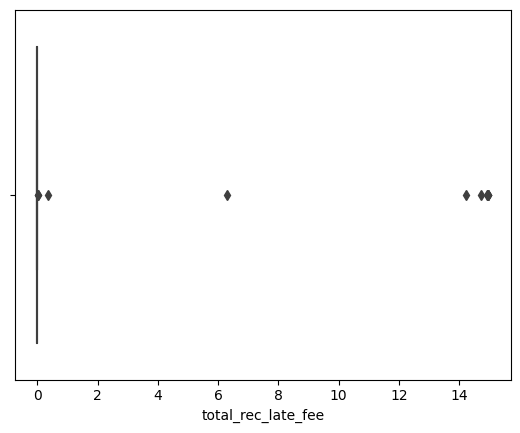

In [494]:
sns.boxplot(x=data['total_rec_late_fee'],data=data)
plt.xlabel('total_rec_late_fee', fontsize=10)
plt.show()

Although there is a significant number of data point distant from the upper quartile, I believe this is the case that those are not outliers, their values are significant for the target classification. Not removing any others.

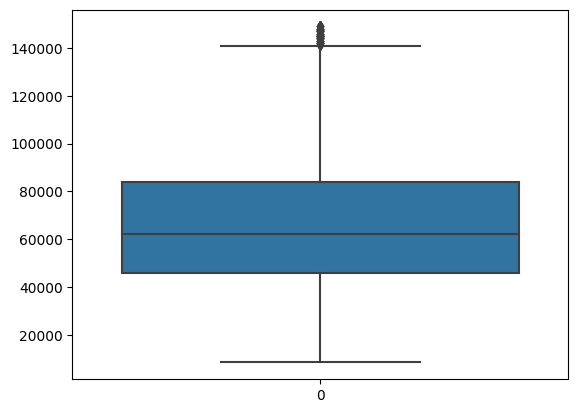

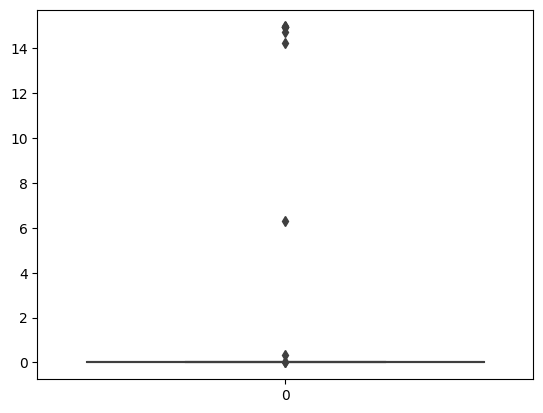

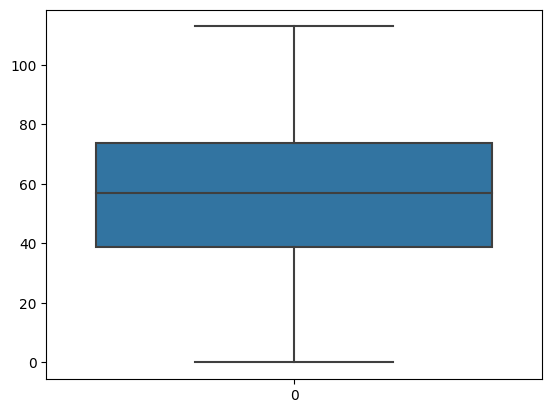

In [495]:
for col in data[["annual_inc", "total_rec_late_fee", "revol_util"]].columns:
    sns.boxplot(data[col])
    plt.show()

#MISSING VALUES
Time to detect and eliminate them

In [496]:
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ---> '{portion:.3f}%'")

'annual_inc': number of missing values '915' ---> '4.626%'
'home_ownership': number of missing values '1476' ---> '7.462%'
'dti': number of missing values '152' ---> '0.768%'
'last_major_derog_none': number of missing values '19208' ---> '97.113%'


# ‘annual_inc’

In [497]:
data.annual_inc.value_counts(dropna=False)

NaN         915
60000.0     771
50000.0     729
65000.0     607
70000.0     599
           ... 
49955.0       1
112711.0      1
66389.0       1
62212.0       1
36676.0       1
Name: annual_inc, Length: 2349, dtype: int64

Strategy: Replacing missing values with the mean (average).



In [498]:
data["annual_inc"] = data.annual_inc.fillna(data.annual_inc.mean())
print(f"Fillna done. Anomalies detected: {data.annual_inc.isnull().values.any()}")

Fillna done. Anomalies detected: False


# ‘home_ownership’

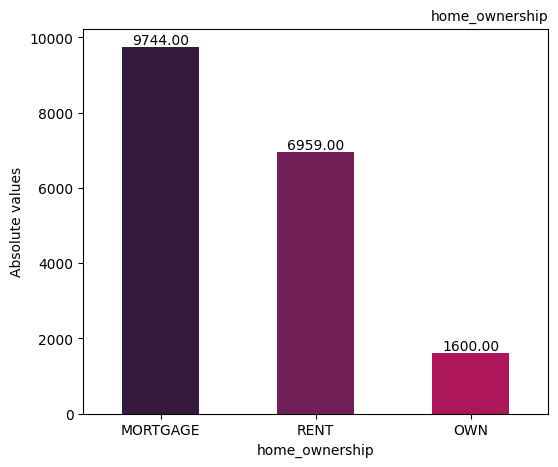

In [499]:
data.home_ownership.value_counts(dropna=False)
bar("home_ownership")

Strategy: Mode imputation (replacing NaN by most frequent value: Mortage).

#‘dti’

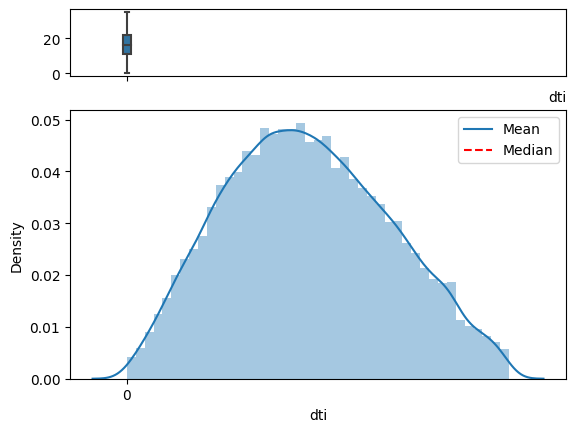

In [500]:
data.dti.value_counts(dropna=False)
boxhist("dti")

Strategy: Replacing missing values with the mean (average).

In [501]:
data["dti"] = data.dti.fillna(data.dti.mean())
print(f"Fillna done. Missing values: {data.dti.isnull().values.any()}")

Fillna done. Missing values: False


# ‘last_major_derog_none’

In [502]:
abs_mv = data.last_major_derog_none.value_counts(dropna=False)
pc_mv = data.last_major_derog_none.value_counts(dropna=False, normalize=True) * 100
pc_mv_df = pd.DataFrame(pc_mv)
pc_mv_df.rename(columns={"last_major_derog_none":"Percent %"}, inplace=True)
abs_pc = pd.concat([abs_mv,pc_mv_df], axis=1)
abs_pc

,last_major_derog_none,Percent %
NaN,19208,97.113100
1.0,435,2.199302
0.0,136,0.687598


Strategy: Drop ‘last_major_derog_none’ numerical variable (too many anomalies).

In [503]:
data.drop("last_major_derog_none", axis=1, inplace=True)
print(f"All missing values are solved in the entire dataset: {data.notnull().values.any()}")

All missing values are solved in the entire dataset: True


# FEATURE SELECTION

In [504]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19779 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19779 non-null  int64  
 1   grade               19779 non-null  object 
 2   annual_inc          19779 non-null  float64
 3   short_emp           19779 non-null  int64  
 4   emp_length_num      19779 non-null  int64  
 5   home_ownership      18303 non-null  object 
 6   dti                 19779 non-null  float64
 7   purpose             19779 non-null  object 
 8   term                19779 non-null  object 
 9   last_delinq_none    19779 non-null  int64  
 10  revol_util          19779 non-null  float64
 11  total_rec_late_fee  19779 non-null  float64
 12  od_ratio            19779 non-null  float64
 13  bad_loan            19779 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 2.8+ MB


Strategy: Drop ‘id’ numerical variable (irrelevant feature).

In [505]:
data.drop("id", axis=1, inplace=True)
data.shape

(19779, 13)

Numerical Features and Categorical/Binary Target
Selecting numeric variables only:

In [506]:
data_nu = data.select_dtypes(exclude=["object","category"]).copy()

In [507]:
#Creating subsets:
Xnum = data_nu.drop(["bad_loan"], axis= "columns")
ynum = data_nu.bad_loan

In [508]:
# Identifying the predictive features using the Pearson Correlation p-value
pd.DataFrame(
    [scipy.stats.pearsonr(Xnum[col], 
    ynum) for col in Xnum.columns], 
    columns=["Pearson Corr.", "p-value"], 
    index=Xnum.columns,
).round(4)

,Pearson Corr.,p-value
annual_inc,-0.1227,0.0000
short_emp,0.0368,0.0000
emp_length_num,-0.0406,0.0000
dti,0.1394,0.0000
last_delinq_none,0.0216,0.0024
revol_util,0.1013,0.0000
total_rec_late_fee,0.0240,0.0007
od_ratio,0.0007,0.9214


Strategy: Drop ‘od_ratio’ (p-value > 0.05) → low information to the target, and keep all the others.

#Categorical Features and Categorical/Binary Target
Selecting categoric variables only:

In [509]:
Xcat = data.select_dtypes(exclude=['int64','float64']).copy()

Creating subsets:

In [510]:
Xcat['target'] = data.bad_loan
Xcat.dropna(how="any", inplace=True)
ycat = Xcat.target
Xcat.drop("target", axis=1, inplace=True)

#Chi-square test for independence:



In [511]:
for col in Xcat.columns:
    table = pd.crosstab(Xcat[col], ycat)
    print()
    display(table)
    _, pval, _, expected_table = scipy.stats.chi2_contingency(table)
    print(f"p-value: {pval:.25f}")

target,0,1
grade,,
A,1866,111
B,4855,686
C,4067,1042
D,2353,870
E,1024,483
F,484,310
G,92,60


p-value: 0.0000000000000000000000000



target,0,1
home_ownership,,
MORTGAGE,8101,1643
OWN,1293,307
RENT,5347,1612


p-value: 0.0000000000000000000000437



target,0,1
purpose,,
car,128,28
credit_card,3181,628
debt_consolidation,9067,2214
home_improvement,821,181
house,80,11
major_purchase,264,82
medical,126,32
moving,86,26
other,691,241


p-value: 0.0000000000002782516648104



target,0,1
term,,
36 months,11469,2245
60 months,3272,1317


p-value: 0.0000000000000000000000000


Strategy: Keep all features (p-value < 0.05). The categorical variables have predictive power.

#ENCODING & TRANSFORMATIONS
Let’s continue by encoding and transforming the categorical variables into numeric ones.

The feature ‘grade’ is a scale which means i’ll be mapping it to numbers. On the other hand, concerning the variables ‘term’, ‘home_ownership’ and ‘purpose’, we need to inspect and decide which procedure (OHE or Binary Encoding) is the best option.

#Variable: ‘grade’

In [512]:
data["grade"] = data.grade.map({"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1})

Variables: ‘term’, ‘home_ownership’, ‘purpose’
One Hot Encoding and Binary Encoding will be both displayed so we can chose the best to apply.

In [513]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [514]:
import category_encoders
from category_encoders import BinaryEncoder

In [515]:
df_term = data.term
df_home = data.home_ownership
df_purp = data.purpose
#term
t_ohe = pd.get_dummies(df_term)
bin_enc_term = BinaryEncoder()
t_bin = bin_enc_term.fit_transform(df_term)
#home_ownsership
h_ohe = pd.get_dummies(df_home)
bin_enc_home = BinaryEncoder()
h_bin = bin_enc_home.fit_transform(df_home)
#purpose
p_ohe = pd.get_dummies(df_purp)
bin_enc_purp = BinaryEncoder()
p_bin = bin_enc_purp.fit_transform(df_purp)


#One Hot Encoding (OHE)

In [516]:
data = pd.get_dummies(data, columns=["term","home_ownership"])

In [517]:
#Binary Encoding
bin_enc_purp = BinaryEncoder()
data_bin = bin_enc_purp.fit_transform(data.purpose)

In [518]:
# Concatenating both datasets
df = pd.concat([data,data_bin],axis=1)
# Dropping 'purpose'
df.drop(["purpose"], axis=1, inplace=True)
# Lowering upper characters
df.columns = [x.lower() for x in df.columns]
# printing 5 first rows
df.head()

,grade,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,term_ 36 months,term_ 60 months,home_ownership_mortgage,home_ownership_own,home_ownership_rent,purpose_0,purpose_1,purpose_2,purpose_3
0,7,100000.0,1,1,26.27,1,43.2,0.0,0.160624,0,1,0,0,0,1,0,0,0,1
1,7,83000.0,0,4,5.39,0,21.5,0.0,0.810777,0,1,0,0,1,0,0,0,0,1
2,4,78000.0,0,11,18.45,1,46.3,0.0,0.035147,1,0,1,1,0,0,0,0,1,0
3,4,37536.0,0,6,12.28,0,10.7,0.0,0.534887,1,0,1,1,0,0,0,0,1,1
4,4,65000.0,0,11,11.26,0,15.2,0.0,0.166500,0,1,0,1,0,0,0,0,1,0


At this point, we are ready to test and train some models!

#MACHINE LEARNING: Predictive modeling
We’re dealing with a supervised binary problem using classification techniques.

Given that we have unbalanced data, we’ll use AUC ROC as the best metric to evaluate the performance of the following models.

Let’s define a function of the AUC to plot and display the threshold between the true positive rate (TPR) and false positive rate (FPR).


# Logistic Regression (LR)

In [519]:
# Making a copy of the dataset
df_lr = df.copy()

In [520]:
from sklearn.model_selection import train_test_split

In [521]:
# Split the data into features and target variable
X = df_lr.drop('bad_loan', axis=1)
y = df_lr['bad_loan']

In [522]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)

In [523]:
from sklearn.preprocessing import MinMaxScaler

In [524]:
# Normalizing the train and test data
scaler_lr = MinMaxScaler()
features_names = X_train_lr.columns
X_train_lr = scaler_lr.fit_transform(X_train_lr)
X_train_lr = pd.DataFrame(X_train_lr, columns = features_names)
X_test_lr = scaler_lr.transform(X_test_lr)
X_test_lr = pd.DataFrame(X_test_lr, columns = features_names)

In [525]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_lr, y_train_lr)

LogisticRegression()

In [526]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [527]:
# Predict the outcomes
y_pred_lr = model.predict(X_test_lr)
# Calculate confusion matrix
conf_mat_lr = confusion_matrix(y_test_lr, y_pred_lr)
print('Confusion matrix:\n', conf_mat_lr)

Confusion matrix:
 [[3172   34]
 [ 703   47]]


In [528]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score


In [529]:
# Calculate precision
precision_lr = precision_score(y_test_lr, y_pred_lr)
print("Precision_lr:", precision_lr)

Precision_lr: 0.5802469135802469


In [530]:
# Calculate recall
recall_lr = recall_score(y_test_lr, y_pred_lr)
print("Recall_lr:", recall_lr)

Recall_lr: 0.06266666666666666


In [531]:
# Calculate f1 score
f1_lr= f1_score(y_test_lr, y_pred_lr)
print("F1 score_lr:", f1_lr)

F1 score_lr: 0.11311672683513838


In [532]:
# Calculate ROC curve and AUC score
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_lr, y_pred_lr)
auc_lr = roc_auc_score(y_test_lr, y_pred_lr)
print("AUC score_lr:", auc_lr)


AUC score_lr: 0.5260307756290289


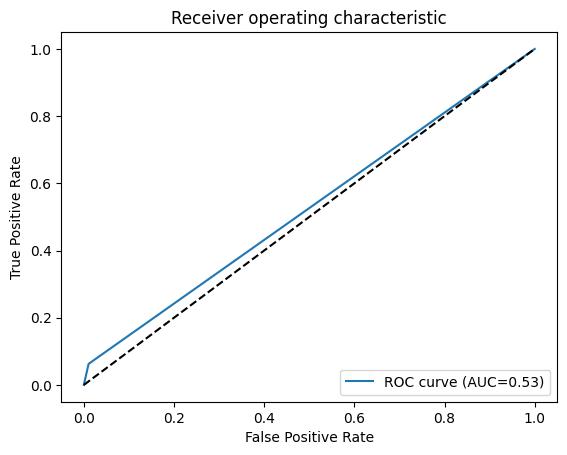

In [533]:
plt.plot(fpr_lr, tpr_lr, label='ROC curve (AUC={:.2f})' .format(auc_lr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbors (KNN)

In [534]:
# Making a copy of the dataset
df_knn = df.copy()

In [535]:
# Split the data into features and target variable
X = df_knn.drop('bad_loan', axis=1)
y = df_knn['bad_loan']

In [536]:
# Split the data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=42)

In [537]:
# Normalizing train and test data
scaler_knn = MinMaxScaler()
features_names = X_train_knn.columns
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_train_knn = pd.DataFrame(X_train_knn, columns = features_names)
X_test_knn = scaler_knn.transform(X_test_knn)
X_test_knn = pd.DataFrame(X_test_knn, columns = features_names)

In [538]:
from sklearn.neighbors import KNeighborsClassifier

In [539]:
# Train a KNN classifier on the training data
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_knn, y_train_knn)


KNeighborsClassifier()

In [540]:
# Make predictions on testing data
y_pred_knn= model.predict(X_test_knn)

In [541]:
# Calculate confusion matrix
cm_knn = confusion_matrix(y_test_knn, y_pred_knn)
print("Confusion matrix:")
print(cm_knn)


Confusion matrix:
[[3006  200]
 [ 655   95]]


In [542]:
# Calculate precision
precision_knn = precision_score(y_test_knn, y_pred_knn)
print("Precision_knn:", precision_knn)

Precision_knn: 0.3220338983050847


In [543]:
# Calculate recall
recall_knn = recall_score(y_test_knn, y_pred_knn)
print("Recall_knn:", recall_knn)

Recall_knn: 0.12666666666666668


In [544]:
# Calculate f1 score
f1_knn = f1_score(y_test_knn, y_pred_knn)
print("F1 score_knn:", f1_knn)

F1 score_knn: 0.18181818181818182


In [545]:
# Calculate ROC curve and AUC score
fpr_knn, tpr_knn, thresholds_knn= roc_curve(y_test_knn, y_pred_knn)
auc_knn = roc_auc_score(y_test_knn, y_pred_knn)
print("AUC score_knn:", auc_knn)

AUC score_knn: 0.5321418174256602


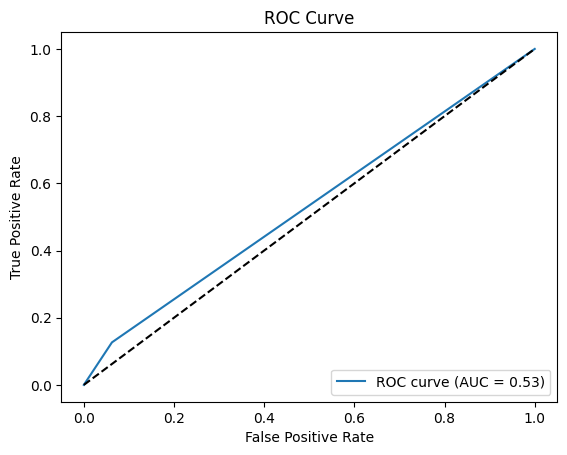

In [546]:
# Plot ROC curve
plt.plot(fpr_knn, tpr_knn, label="ROC curve (AUC = {:.2f})".format(auc_knn))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


# Support Vector Machine (SVC)

In [547]:
# Making a copy of the dataset
df_svm = df.copy()

In [548]:
# Split the data into features and target variable
X = df_svm.drop('bad_loan', axis=1)
y = df_svm['bad_loan']

In [549]:
# Split the data into training and testing sets
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.2, random_state=42)

In [550]:
from sklearn.preprocessing import StandardScaler

In [551]:
# Standardization of train and test data
zscore_svc = StandardScaler()
features_names = X_train_svc.columns
X_train_svc = zscore_svc.fit_transform(X_train_svc)
X_train_svc = pd.DataFrame(X_train_svc, columns = features_names)
X_test_svc = zscore_svc.transform(X_test_svc)
X_test_svc = pd.DataFrame(X_test_svc, columns = features_names)

In [552]:
from sklearn.svm import SVC

In [553]:
# Train a SVM classifier on the training data
model = SVC(kernel='linear', probability=True)
model.fit(X_train_svc, y_train_svc)

SVC(kernel='linear', probability=True)

In [554]:
# Make predictions on testing data
y_pred_svc = model.predict(X_test_svc)

In [555]:
# Calculate confusion matrix
cm_svc = confusion_matrix(y_test_svc, y_pred_svc)
print("Confusion matrix:")
print(cm_svc)

Confusion matrix:
[[3205    1]
 [ 748    2]]


In [556]:
# Calculate precision
precision_svc = precision_score(y_test_svc, y_pred_svc)
print("Precision:", precision_svc)

Precision: 0.6666666666666666


In [557]:
# Calculate recall
recall_svc = recall_score(y_test_svc, y_pred_svc)
print("Recall:", recall_svc)

Recall: 0.0026666666666666666


In [558]:
# Calculate f1 score
f1_svc= f1_score(y_test_svc, y_pred_svc)
print("F1 score:", f1_svc)

F1 score: 0.005312084993359893


In [559]:
# Calculate ROC curve and AUC score
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test_svc, y_pred_svc)
auc_svc = roc_auc_score(y_test_svc, y_pred_svc)
print("AUC score:", auc_svc)

AUC score: 0.501177375753795


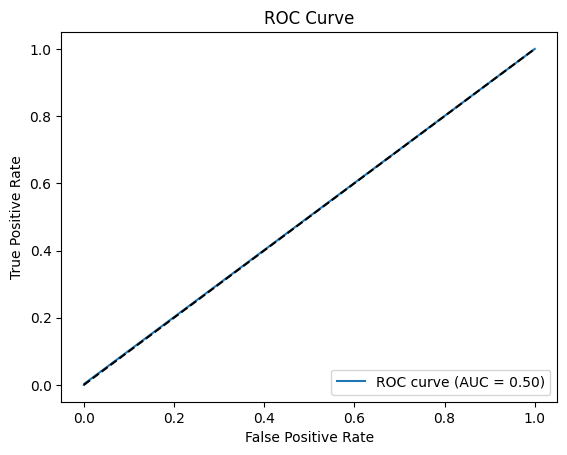

In [560]:
# Plot ROC curve
plt.plot(fpr_svc, tpr_svc, label="ROC curve (AUC = {:.2f})".format(auc_svc))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Decision Trees (DT)

In [561]:
from sklearn.tree import DecisionTreeClassifier

In [562]:
# Making a copy of the dataset
df_dt = df.copy()

In [563]:
# Split the data into features and target variable
X = df_dt.drop('bad_loan', axis=1)
y = df_dt['bad_loan']

In [564]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

In [565]:
# Train a Decision Tree classifier on the training data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_dt, y_train_dt)


DecisionTreeClassifier(random_state=42)

In [566]:
# Make predictions on testing data
y_pred_dt= model.predict(X_test_dt)

In [567]:
# Calculate confusion matrix
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)
print("Confusion matrix:")
print(cm_dt)

Confusion matrix:
[[2565  641]
 [ 541  209]]


In [568]:
# Calculate precision
precision_dt = precision_score(y_test_dt, y_pred_dt)
print("Precision:", precision_dt)

Precision: 0.24588235294117647


In [569]:
# Calculate recall
recall_dt = recall_score(y_test_dt, y_pred_dt)
print("Recall:", recall_dt)

Recall: 0.2786666666666667


In [570]:
# Calculate f1 score
f1_dt = f1_score(y_test_dt, y_pred_dt)
print("F1 score:", f1_dt)


F1 score: 0.26125000000000004


In [571]:
# Calculate ROC curve and AUC score
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_dt, y_pred_dt)
auc_dt= roc_auc_score(y_test_dt, y_pred_dt)
print("AUC score:", auc_dt)


AUC score: 0.5393645248492409


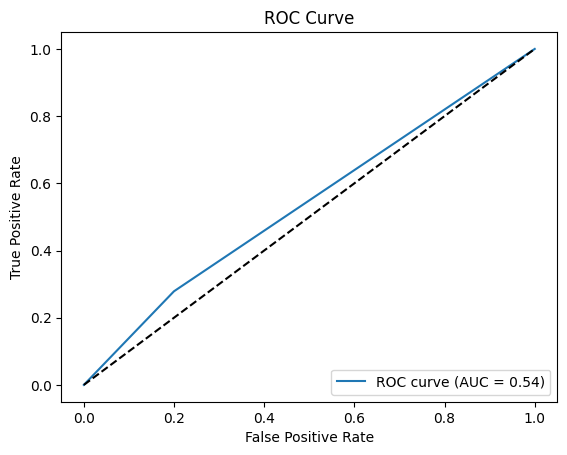

In [572]:
# Plot ROC curve
plt.plot(fpr_dt, tpr_dt, label="ROC curve (AUC = {:.2f})".format(auc_dt))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Random Forest (RF)

In [573]:
# Making a copy of the dataset
df_rf = df.copy()

In [574]:
# Split the data into features and target variable
X = df_rf.drop('bad_loan', axis=1)
y = df_rf['bad_loan']

In [575]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

In [576]:
from sklearn.ensemble import RandomForestClassifier

In [577]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [578]:
# Make predictions on testing data
y_pred_rf = model.predict(X_test_rf)

In [579]:
# Calculate confusion matrix
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
print("Confusion matrix:")
print(cm_rf)

Confusion matrix:
[[3145   61]
 [ 703   47]]


In [580]:
# Calculate precision
precision_rf = precision_score(y_test_rf, y_pred_rf)
print("Precision:", precision_rf)

Precision: 0.4351851851851852


In [581]:
# Calculate recall
recall_rf = recall_score(y_test_rf, y_pred_rf)
print("Recall:", recall_rf)


Recall: 0.06266666666666666


In [582]:
# Calculate f1 score
f1_rf= f1_score(y_test_rf, y_pred_rf)
print("F1 score:", f1_rf)

F1 score: 0.10955710955710955


AUC score: 0.521819920981493


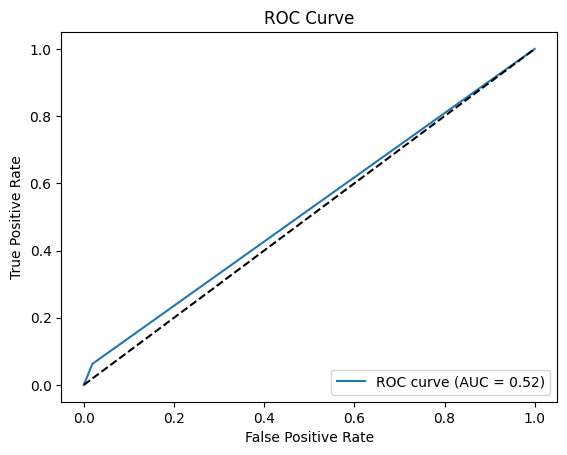

In [583]:
# Calculate ROC curve and AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_rf)
auc_rf = roc_auc_score(y_test_rf, y_pred_rf)
print("AUC score:", auc_rf)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, label="ROC curve (AUC = {:.2f})".format(auc_rf))
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# RESULTS: Performance comparison between models


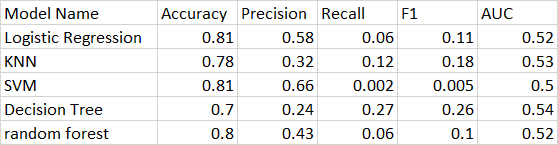

##Conclusion

Best model: Support Vector Machine - Classifier (SVC): 81 % Accuracy.

 The rule of thumb is very straightforward: the higher the value of the ROC AUC metric, the better. If a random model would show 0.5, a perfect model would achieve 1.0.

The ratio between TPR and FPR determined by a threshold over which results in a positive instance puts the chosen model (SVC) at a reasonable level ( C ) with a ROC AUC score of 75.21%.